# HR Analytics Project- Understanding the Attrition in HR

## Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)
print("import complete")

import complete


### Loading the dataset 

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")  
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Exploratory Data Analysis

Firstly, will be proceeding with exploratory data analysis and will be analyzing the following:
- General info about the dataset
- missing values 
- analyzing types of variables
  - numerical variables
  - categorical if any
- visualisation 
- detecting outliers
- distributions of variables
- relationship between independent and dependent features

In [3]:
#checking shape of dataset
data.shape

(1470, 35)

In [4]:
# checking information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are total 34 features Attrition being the target feature, where 26 are int type variables and 9 object type variables

In [5]:
# checking column names
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# checking datatypes of the variables
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
#checking missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

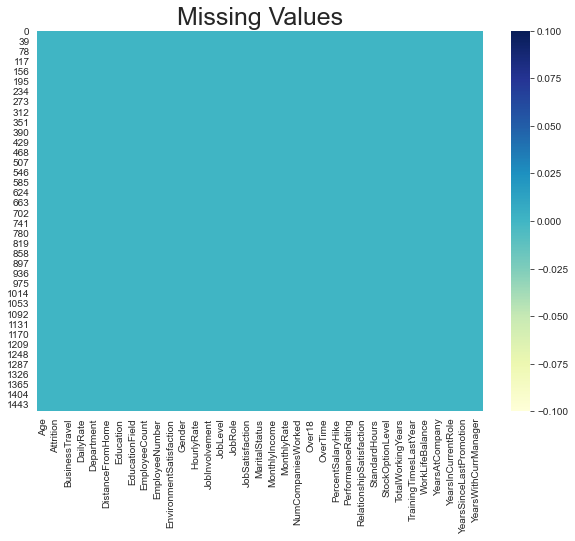

In [8]:
# visualising the missing values 
plt.figure(figsize=(10,7))
plt.title("Missing Values",fontsize=25)
sns.heatmap(data.isnull(),cmap='YlGnBu')
plt.show()

From the above observations can see that dataset has no null values

In [9]:
#since Attrition is a categotical in nature so will be mapping it with integrs variables for further analysis
data.Attrition = data.Attrition.map({"Yes":1,"No":0})

In [10]:
#checking statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


- For most of the variables can see that mean and median are  close which show many of them are  normally distributed
- For some features max value is far away from 75th percentile which also depicts outliers are present
- Also only some of the features have very high standad deviations which implies that the data is widely spread and varies alot from the mean

In [11]:
# Finding correlation between the variables
correlation = data.corr(method='spearman')
correlation

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.171214,0.007290,-0.019291,0.204937,NaN,-0.001770,0.009820,0.028858,0.034456,0.489618,-0.005185,0.471902,0.017451,0.353213,0.007709,0.000093,0.046063,NaN,0.056633,0.656896,0.000316,-0.003707,0.251686,0.197978,0.173647,0.194818
Attrition,-0.171214,1.000000,-0.056970,0.079248,-0.030346,NaN,-0.010369,-0.096486,-0.006692,-0.119496,-0.190370,-0.102948,-0.198305,0.015258,0.030505,-0.023612,0.002889,-0.042664,NaN,-0.172296,-0.199002,-0.051757,-0.051951,-0.190419,-0.180623,-0.053273,-0.175355
DailyRate,0.007290,-0.056970,1.000000,-0.002754,-0.013607,NaN,-0.051800,0.018961,0.023511,0.042469,0.003816,0.027829,0.016260,-0.032360,0.036548,0.025070,0.000624,0.009685,NaN,0.038514,0.020951,-0.011339,-0.040352,-0.009778,0.007208,-0.037631,-0.004717
DistanceFromHome,-0.019291,0.079248,-0.002754,1.000000,0.015708,NaN,0.038906,-0.010401,0.020446,0.034430,0.022148,-0.013078,0.002512,0.039618,-0.009592,0.029666,0.011320,0.005852,NaN,0.030190,-0.002912,-0.024848,-0.020402,0.010513,0.013708,-0.004685,0.004448
Education,0.204937,-0.030346,-0.013607,0.015708,1.000000,NaN,0.042815,-0.027625,0.014432,0.037231,0.107419,-0.005175,0.120028,-0.021214,0.135103,0.004300,-0.025081,-0.013173,NaN,0.013794,0.162177,-0.023749,0.017350,0.064196,0.054567,0.032203,0.051292
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.001770,-0.010369,-0.051800,0.038906,0.042815,NaN,1.000000,0.021750,0.034717,-0.002453,-0.011057,-0.047150,0.001797,0.011933,0.007011,-0.008179,-0.020675,-0.072991,NaN,0.059480,-0.003748,0.026502,0.009994,0.013205,-0.001079,0.007857,-0.005138
EnvironmentSatisfaction,0.009820,-0.096486,0.018961,-0.010401,-0.027625,NaN,0.021750,1.000000,-0.052380,-0.015301,-0.000192,-0.002993,-0.015163,0.037477,0.006151,-0.030489,-0.029160,0.005353,NaN,0.009826,-0.013882,-0.011659,0.027169,0.008425,0.020140,0.026082,-0.001732
HourlyRate,0.028858,-0.006692,0.023511,0.020446,0.014432,NaN,0.034717,-0.052380,1.000000,0.043884,-0.033876,-0.068340,-0.019762,-0.014888,0.019209,-0.009876,-0.002185,0.000259,NaN,0.050543,-0.012072,0.000292,-0.010003,-0.029032,-0.034016,-0.052412,-0.013811
JobInvolvement,0.034456,-0.119496,0.042469,0.034430,0.037231,NaN,-0.002453,-0.015301,0.043884,1.000000,-0.018424,-0.012148,-0.024552,-0.018117,0.015448,-0.016999,-0.024733,0.037857,NaN,0.034464,0.006444,0.002014,-0.019889,0.013836,0.015548,-0.008307,0.037397


The above table indicates the correlation between the variables and the NaN shows that there is no correlation between the variables.

In [12]:
# since Average price is the target variable let's check the correlation of other variables with it
# arranging in the order of highest to lowest
correlation.Attrition.sort_values(ascending=False).drop('Attrition')

DistanceFromHome            0.079248
NumCompaniesWorked          0.030505
MonthlyRate                 0.015258
PerformanceRating           0.002889
HourlyRate                 -0.006692
EmployeeNumber             -0.010369
PercentSalaryHike          -0.023612
Education                  -0.030346
RelationshipSatisfaction   -0.042664
TrainingTimesLastYear      -0.051757
WorkLifeBalance            -0.051951
YearsSinceLastPromotion    -0.053273
DailyRate                  -0.056970
EnvironmentSatisfaction    -0.096486
JobSatisfaction            -0.102948
JobInvolvement             -0.119496
Age                        -0.171214
StockOptionLevel           -0.172296
YearsWithCurrManager       -0.175355
YearsInCurrentRole         -0.180623
JobLevel                   -0.190370
YearsAtCompany             -0.190419
MonthlyIncome              -0.198305
TotalWorkingYears          -0.199002
EmployeeCount                    NaN
StandardHours                    NaN
Name: Attrition, dtype: float64

#### Analysing features types as numerical or categorical 

In [13]:
# for numerical features
numerical_feat = data.select_dtypes(include=['int64','float64'])
numerical_feat

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


In [128]:
print(numerical_feat.columns)
print("No. of numerical variables :",len(numerical_feat.columns))
print("Number of unique values \n",numerical_feat.nunique())

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
No. of numerical variables : 27
Number of unique values 
 Age                           43
Attrition                      2
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel          

In [14]:
# for categorical features
categorical_feat = data.select_dtypes(include='O')
categorical_feat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [123]:
categorical_feat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [15]:
# Analysing number of Unique values in numerical variables
for var in numerical_feat:
    print("Unique values in {} : {}".format(var,data[var].nunique()))

Unique values in Age : 43
Unique values in Attrition : 2
Unique values in DailyRate : 886
Unique values in DistanceFromHome : 29
Unique values in Education : 5
Unique values in EmployeeCount : 1
Unique values in EmployeeNumber : 1470
Unique values in EnvironmentSatisfaction : 4
Unique values in HourlyRate : 71
Unique values in JobInvolvement : 4
Unique values in JobLevel : 5
Unique values in JobSatisfaction : 4
Unique values in MonthlyIncome : 1349
Unique values in MonthlyRate : 1427
Unique values in NumCompaniesWorked : 10
Unique values in PercentSalaryHike : 15
Unique values in PerformanceRating : 2
Unique values in RelationshipSatisfaction : 4
Unique values in StandardHours : 1
Unique values in StockOptionLevel : 4
Unique values in TotalWorkingYears : 40
Unique values in TrainingTimesLastYear : 7
Unique values in WorkLifeBalance : 4
Unique values in YearsAtCompany : 37
Unique values in YearsInCurrentRole : 19
Unique values in YearsSinceLastPromotion : 16
Unique values in YearsWithCu

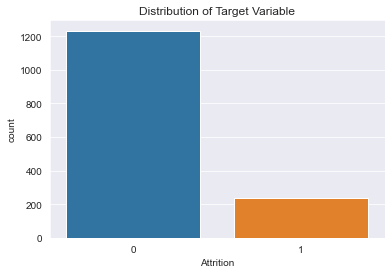

0    1233
1     237
Name: Attrition, dtype: int64


In [16]:
#distribution of target variable
sns.countplot('Attrition',data=data)
plt.title("Distribution of Target Variable")
plt.show()
print(data.Attrition.value_counts())

The above plot shows that there is a huge differnce in the distribution of the target variable, which implies there is imbalance in the dataset.

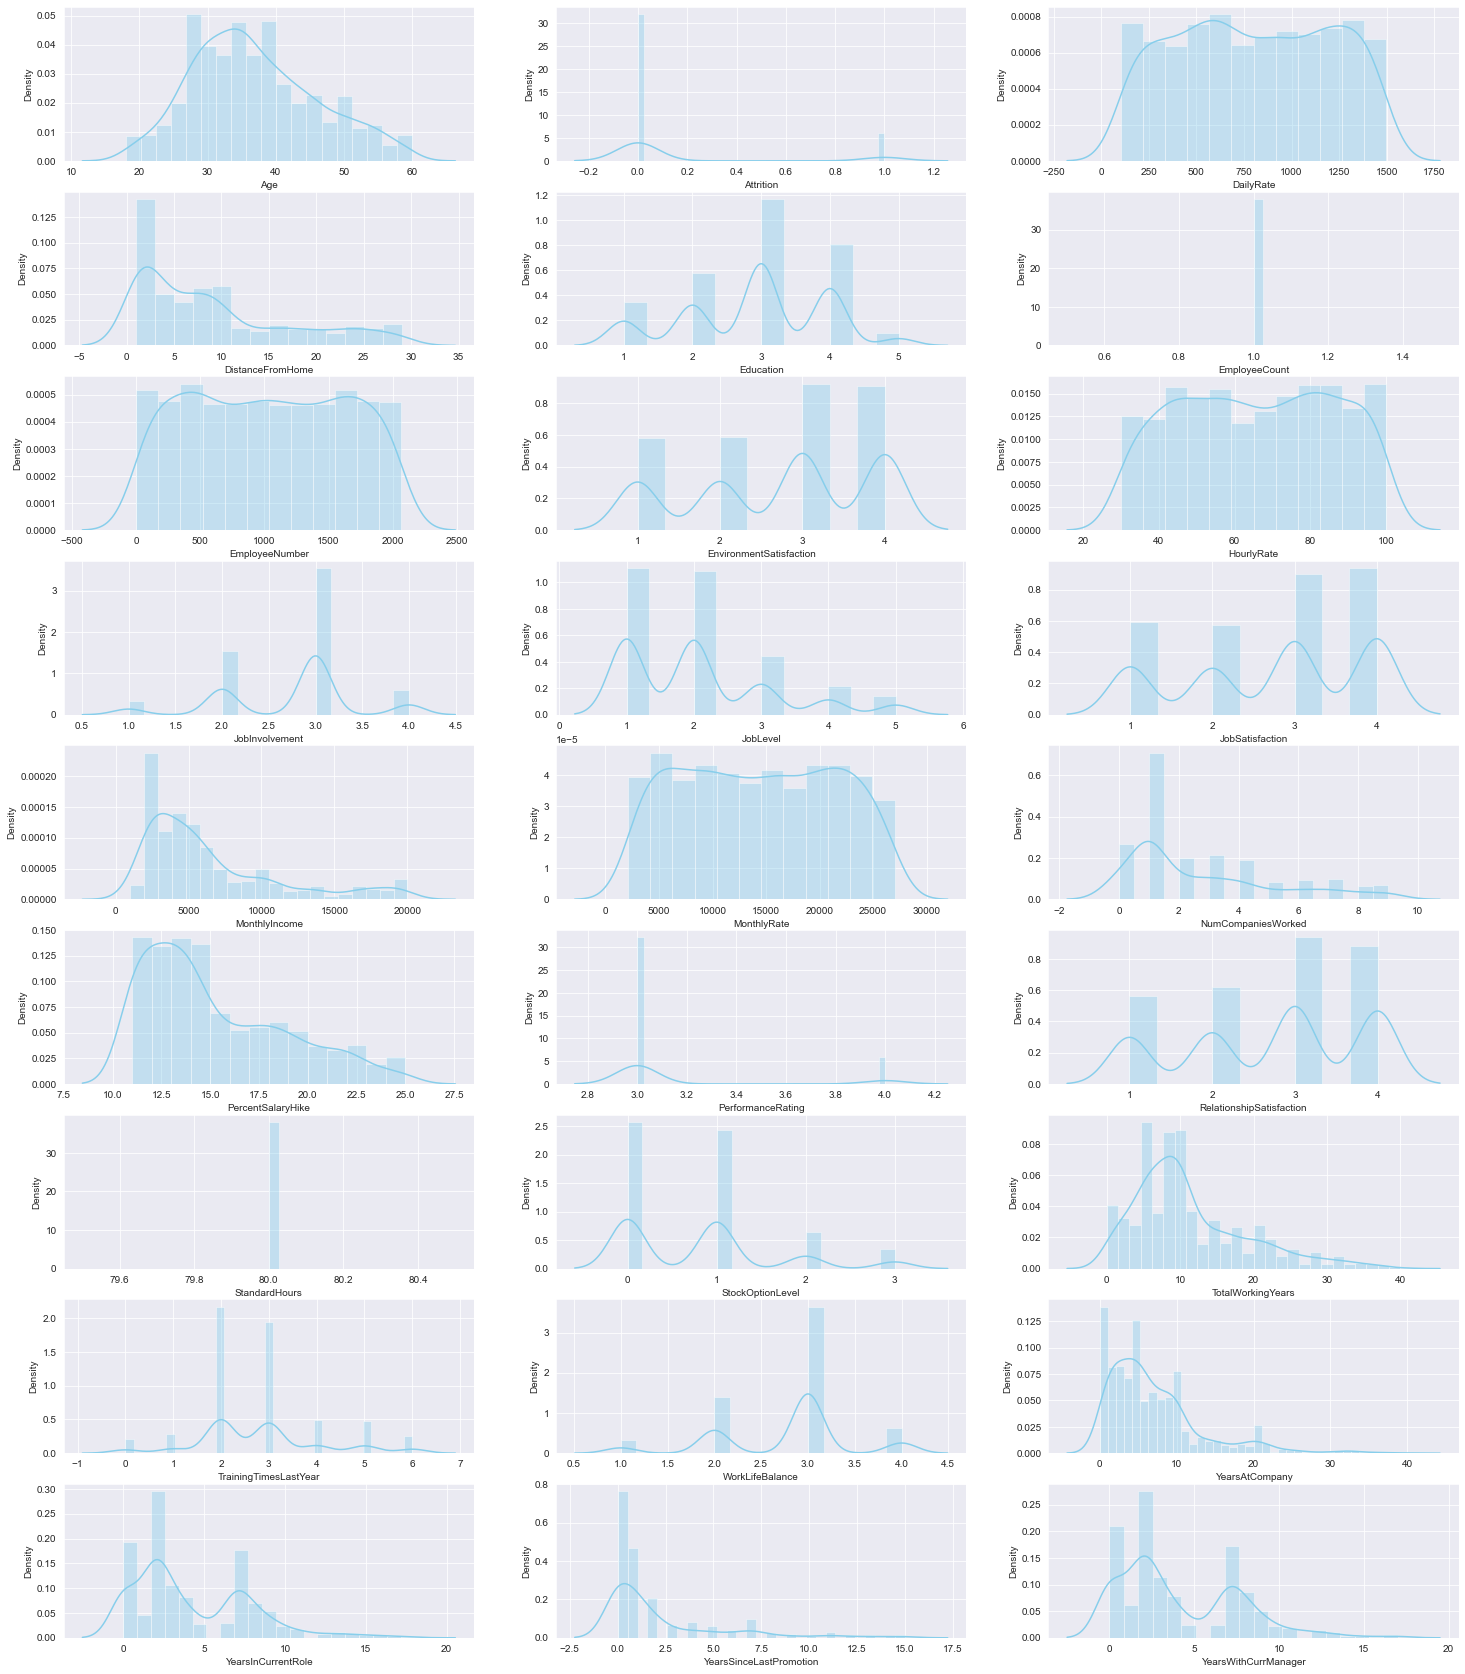

In [118]:
# checking distribution of variables
plt.figure(figsize=(25,30))
plot = 1
for var in numerical_feat:
    plt.subplot(9,3,plot)
    sns.distplot(data[var],color='skyblue')
    plot+=1
plt.show()

In [136]:
numerical_feat.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

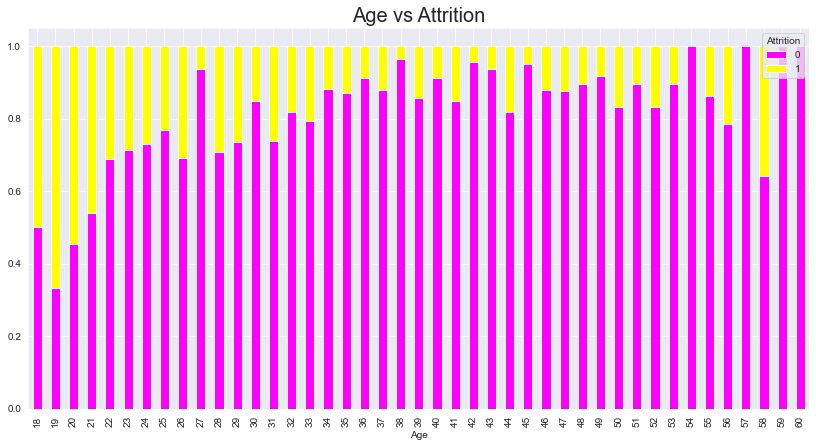

In [154]:
# Age vs attrition
age=pd.crosstab(data.Age,data.Attrition)
age.div(age.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(14,7),cmap='spring')
plt.title("Age vs Attrition",fontsize=20)
plt.show()

Usually employees who are younger or specifically below the age of 30 have high attrition than the older employees.


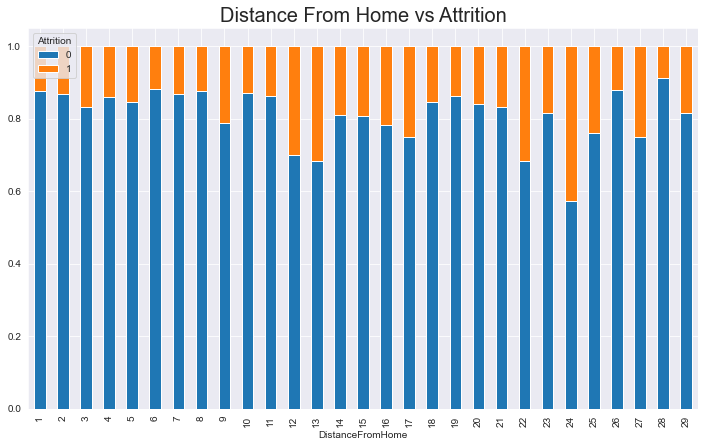

In [17]:
# Distance from home vs attrition
dist=pd.crosstab(data.DistanceFromHome,data.Attrition)
dist.div(dist.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7))
plt.title("Distance From Home vs Attrition",fontsize=20)
plt.show()

Attrition is majorly higher for employees who have larger distance from home, i.e. if an employee is living nearby there is less chance for him or her to leave the organisation.

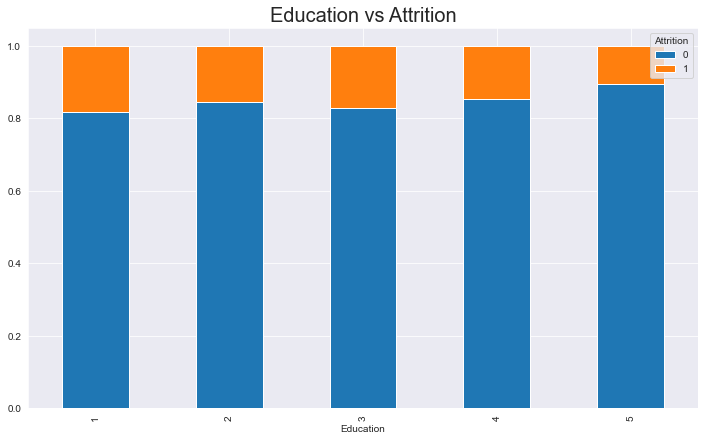

In [18]:
# Education vs Attrition
edu=pd.crosstab(data.Education,data.Attrition)
edu.div(edu.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7))
plt.title("Education vs Attrition",fontsize=20)
plt.show()

Attrition is higher in the case of education level 3 and 1 and is the least in case of level 5 education. Hiring should be done more for higher education level candidates.

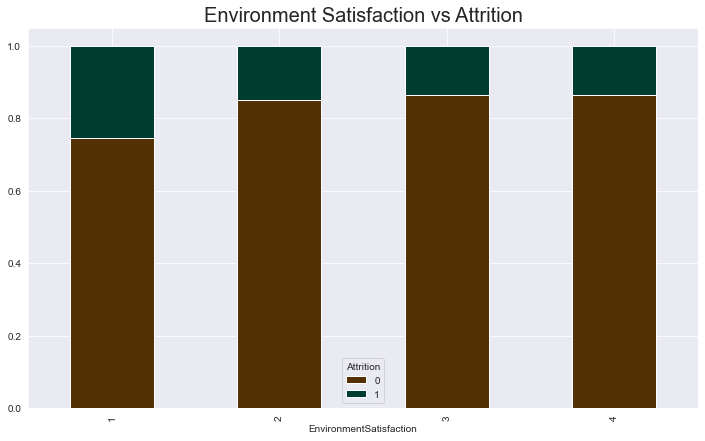

In [19]:
esat=pd.crosstab(data.EnvironmentSatisfaction,data.Attrition)
esat.div(esat.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='BrBG')
plt.title("Environment Satisfaction vs Attrition",fontsize=20)
plt.show()

Attrition is higher for Environment Satisfaction level 1 and least for level 4. Low environment satisfaction can lead to higher attrition.

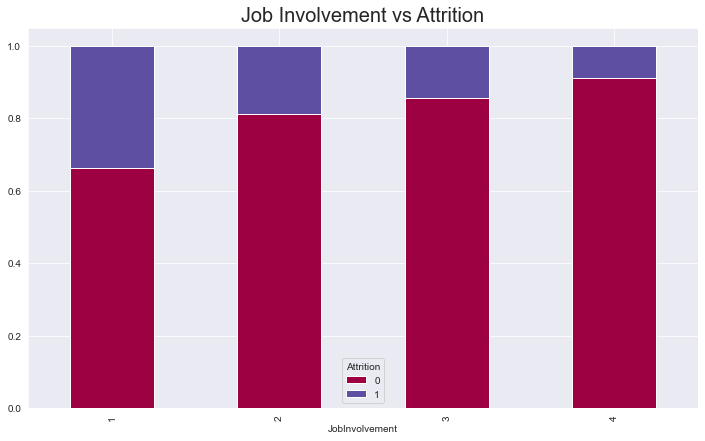

In [20]:
job_inv=pd.crosstab(data.JobInvolvement,data.Attrition)
job_inv.div(job_inv.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='Spectral')
plt.title("Job Involvement vs Attrition",fontsize=20)
plt.show()

Attrition is higher for Job Involvement level 1 and least for level 4 which means employees who are more engaged into their jobs have low chances of leaving.

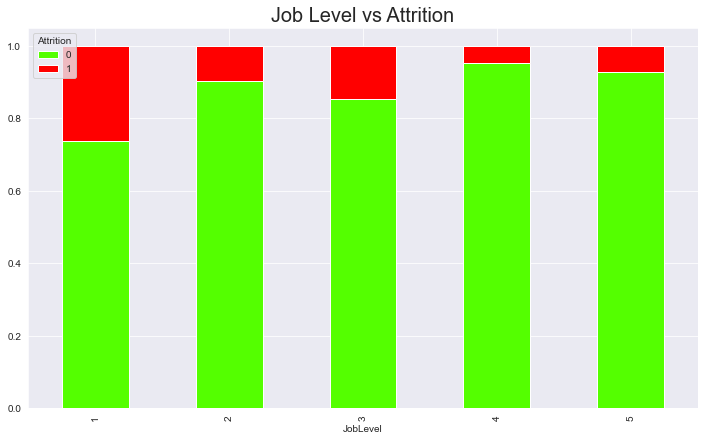

In [21]:
job_lvl=pd.crosstab(data.JobLevel,data.Attrition)
job_lvl.div(job_lvl.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='prism_r')
plt.title("Job Level vs Attrition",fontsize=20)
plt.show()

Attrition is higher for level 1 job and level 3 job and least for job level 5 i.e. employees with higher job levels are less likely to leave the organisation.

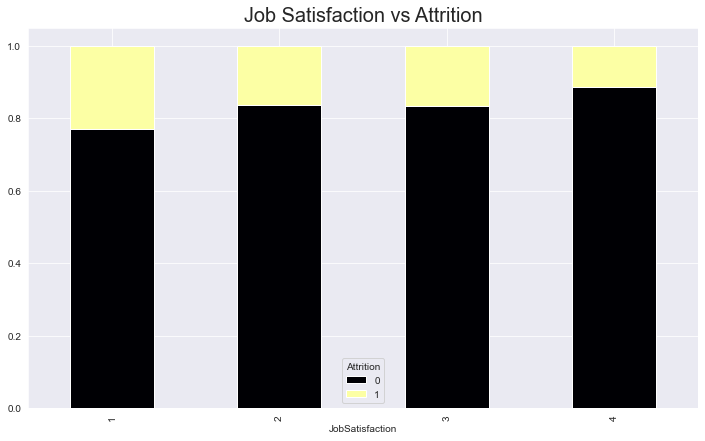

In [22]:
job_sat=pd.crosstab(data.JobSatisfaction,data.Attrition)
job_sat.div(job_sat.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='inferno')
plt.title("Job Satisfaction vs Attrition",fontsize=20)
plt.show()

Attrition is higher for job satisfaction level 1 and least for level 4, which implies employee with higher level of job satisfaction are less likely to leave the organisation.

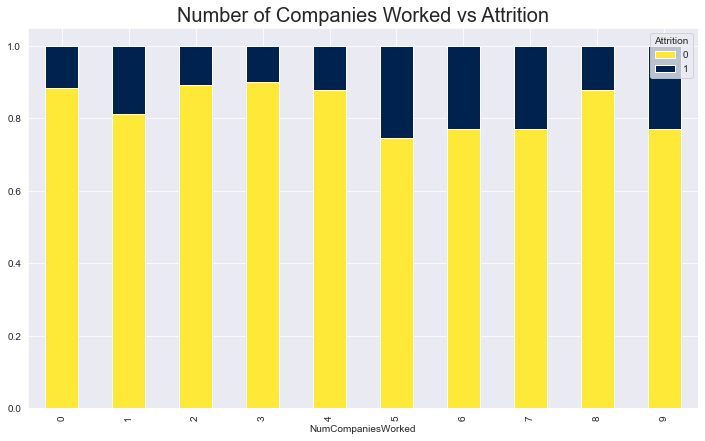

In [23]:
num_org=pd.crosstab(data.NumCompaniesWorked,data.Attrition)
num_org.div(num_org.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='cividis_r')
plt.title("Number of Companies Worked vs Attrition",fontsize=20)
plt.show()

From the above plot we can infer that employee who have worked in more than four companies have higher attrition rate i.e. if an employee has worked in more than 4 organisations it is likely that he/she would leave the company.

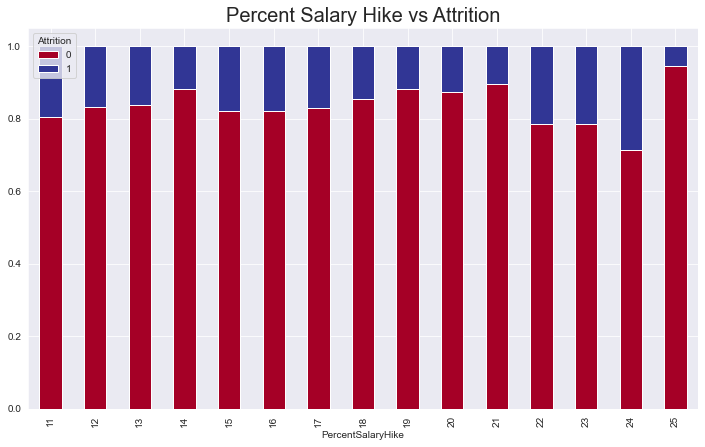

In [24]:
sal_hike_percent=pd.crosstab(data.PercentSalaryHike,data.Attrition)
sal_hike_percent.div(sal_hike_percent.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='RdYlBu')
plt.title("Percent Salary Hike vs Attrition",fontsize=20)
plt.show()

The above plot does not give any specific information on attrition of employees

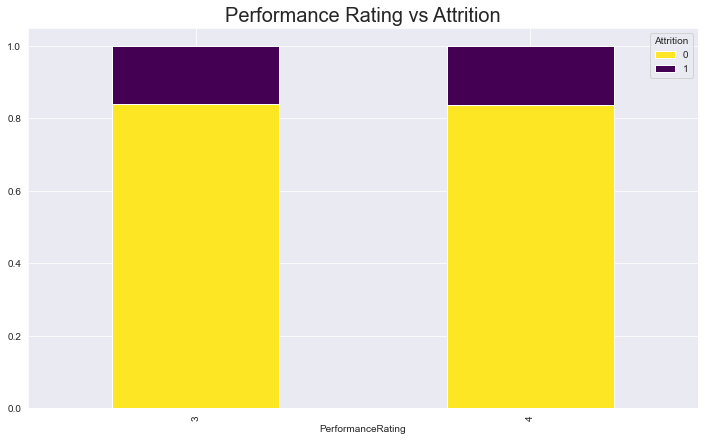

In [25]:
performance=pd.crosstab(data.PerformanceRating,data.Attrition)
performance.div(performance.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='viridis_r')
plt.title("Performance Rating vs Attrition",fontsize=20)
plt.show()

Attrition rate seams to similar for performance rating of 3 and 4.

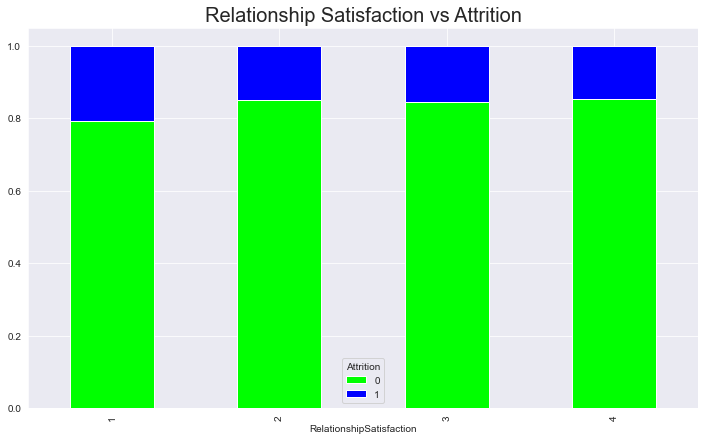

In [26]:
rel_sat=pd.crosstab(data.RelationshipSatisfaction,data.Attrition)
rel_sat.div(rel_sat.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='brg_r')
plt.title("Relationship Satisfaction vs Attrition",fontsize=20)
plt.show()

Attrition is higher for level 1 relationship satisfaction and least for level 4, which implies that the individual with a very good relationship with the employer has low chances of leaving the organisation. 

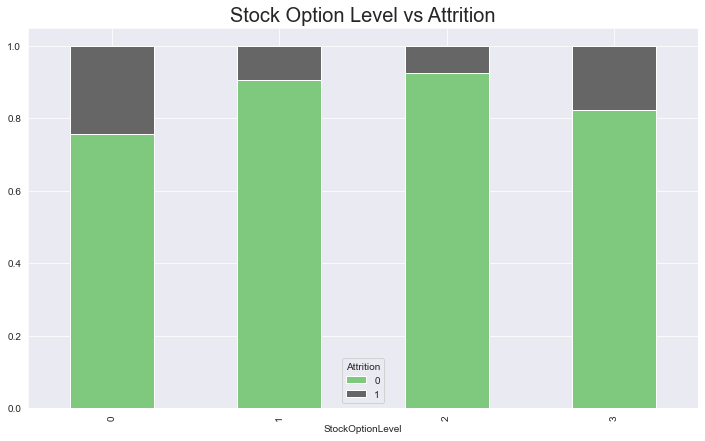

In [27]:
stock_opt=pd.crosstab(data.StockOptionLevel,data.Attrition)
stock_opt.div(stock_opt.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='Accent')
plt.title("Stock Option Level vs Attrition",fontsize=20)
plt.show()

Attrition is higher in the case of 0 level of stock options and lesser in the case of level 1 and 2, which implies the employee stays in organisation if they are given the options to buy stocks

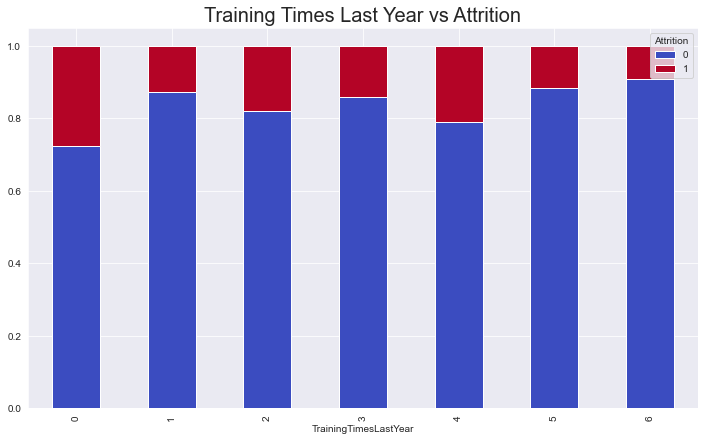

In [28]:
tr_time=pd.crosstab(data.TrainingTimesLastYear,data.Attrition)
tr_time.div(tr_time.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='coolwarm')
plt.title("Training Times Last Year vs Attrition",fontsize=20)
plt.show()

The above plot does not give any specific information on attrition of employees as the attrition is not fixed for training times 

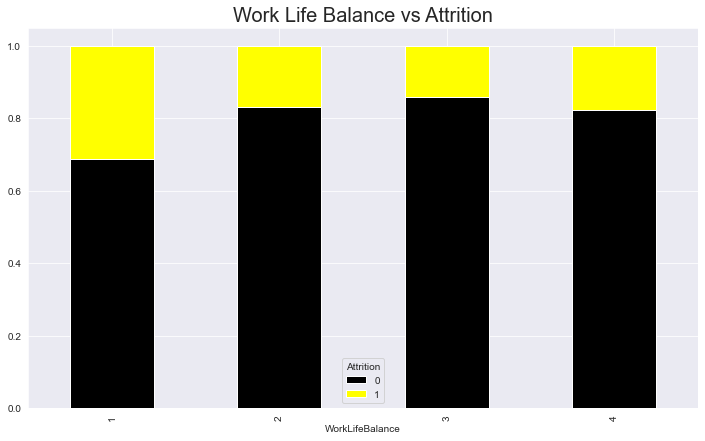

In [29]:
work=pd.crosstab(data.WorkLifeBalance,data.Attrition)
work.div(work.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='gnuplot')
plt.title("Work Life Balance vs Attrition",fontsize=20)
plt.show()

Attrition is high for work life balance of level 1, or we can say that employees with low work life balance are more likely to leave the organisation.

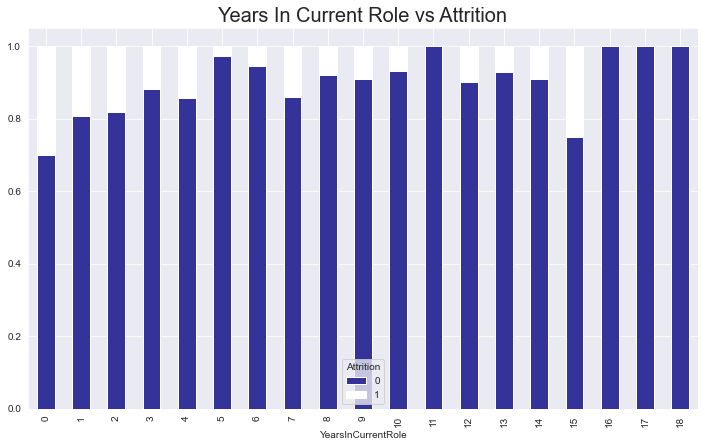

In [30]:
role=pd.crosstab(data.YearsInCurrentRole,data.Attrition)
role.div(role.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='terrain')
plt.title("Years In Current Role vs Attrition",fontsize=20)
plt.show()

Attrition is higher if years in current role is more, but it can vary as from the above plot we can see that for 15 yrs there is good amount of attrition and for 0 years the attrition is high. So we can imply that if the employee is in the current role for less than five years attrition will be higher and same implies if the employee is in the current role for more than 10 yrs.

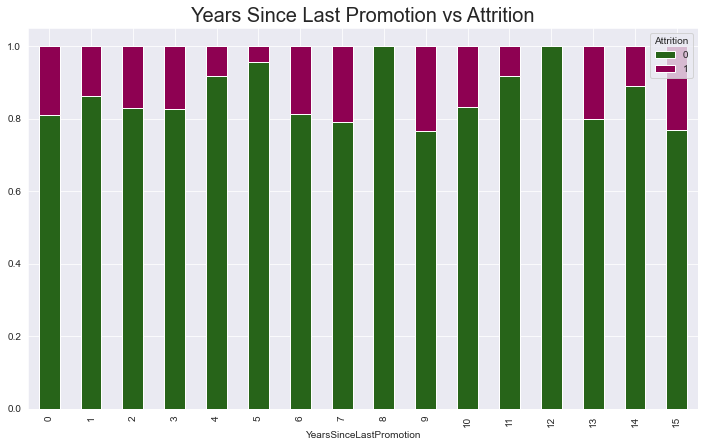

In [31]:
prom=pd.crosstab(data.YearsSinceLastPromotion,data.Attrition)
prom.div(prom.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='PiYG_r')
plt.title("Years Since Last Promotion vs Attrition",fontsize=20)
plt.show()

From the above plot we can infer that employees who have not been promoted since last 8 yrs have a significant amount of attrition whereas if the last promotion is more than 8 yrs than the attrition can be more higher but collectively attrition can vary

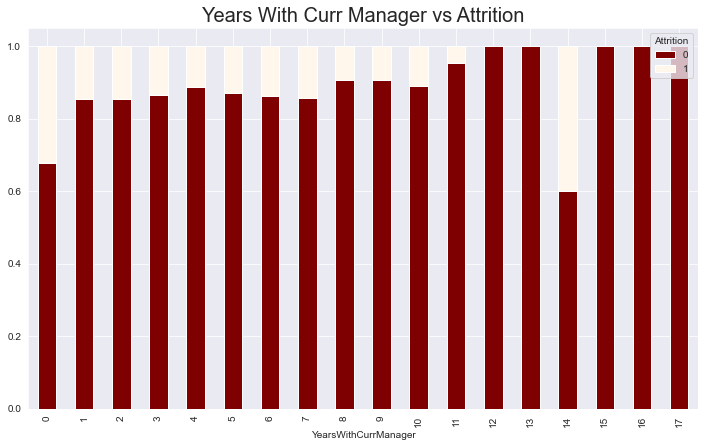

In [32]:
curr_mang=pd.crosstab(data.YearsWithCurrManager,data.Attrition)
curr_mang.div(curr_mang.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='OrRd_r')
plt.title("Years With Curr Manager vs Attrition",fontsize=20)
plt.show()

From the above plot we can infer that as the time passes with a manager the attrition goes down, attrition is high for employee who have less years with current manager.

Analysing Categorical features

In [33]:
for var in categorical_feat:
    print("{} has {} categories".format(var,len(data[var].unique())))

BusinessTravel has 3 categories
Department has 3 categories
EducationField has 6 categories
Gender has 2 categories
JobRole has 9 categories
MaritalStatus has 3 categories
Over18 has 1 categories
OverTime has 2 categories


In [34]:
#checking unique values in type feature
for i in categorical_feat:
    print("Unique values in {} are {}".format(i,data[i].unique()))

Unique values in BusinessTravel are ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in Department are ['Sales' 'Research & Development' 'Human Resources']
Unique values in EducationField are ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique values in Gender are ['Female' 'Male']
Unique values in JobRole are ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique values in MaritalStatus are ['Single' 'Married' 'Divorced']
Unique values in Over18 are ['Y']
Unique values in OverTime are ['Yes' 'No']


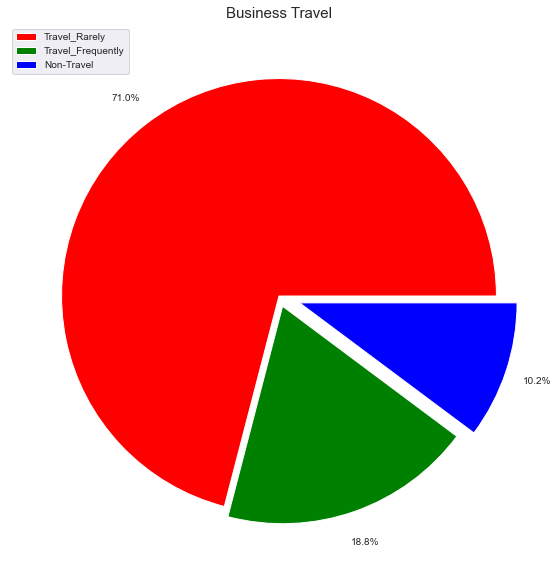

In [35]:
# Analysing Buisness Travel 
colors=['red','green','blue']
size = data.BusinessTravel.value_counts().values
explode_list=[0,0.05,0.1]
plt.figure(figsize=(15,10))
plt.pie(size,labels=None,explode=explode_list,colors=colors,autopct="%1.1f%%",pctdistance=1.15)
plt.title("Business Travel",fontsize=15)
plt.legend(labels=['Travel_Rarely','Travel_Frequently','Non-Travel'],loc='upper left') 
plt.show()

Major no of employees travel rarely, employees who do not travel are veryless in number

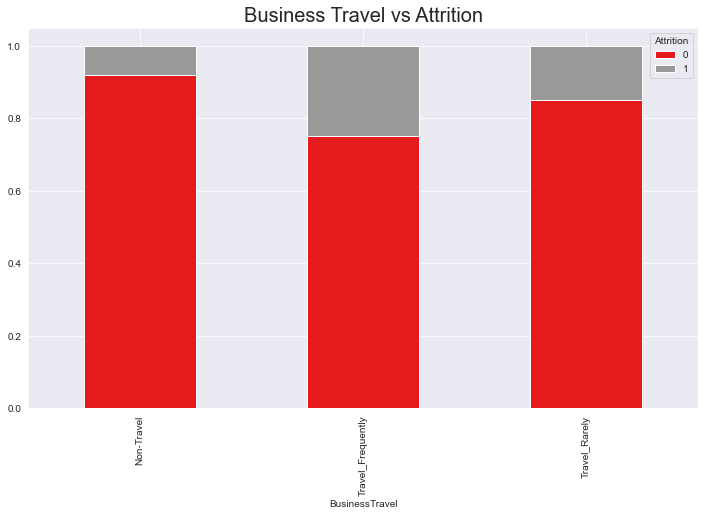

In [107]:
trav = pd.crosstab(data.BusinessTravel,data.Attrition)
trav.div(trav.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='Set1')
plt.title("Business Travel vs Attrition",fontsize=20)
plt.show()

Attrition is higher for frequently travelling candidates and leat for non travellers, or we can say that employee who travel frequently are more likely to leave the organisation.

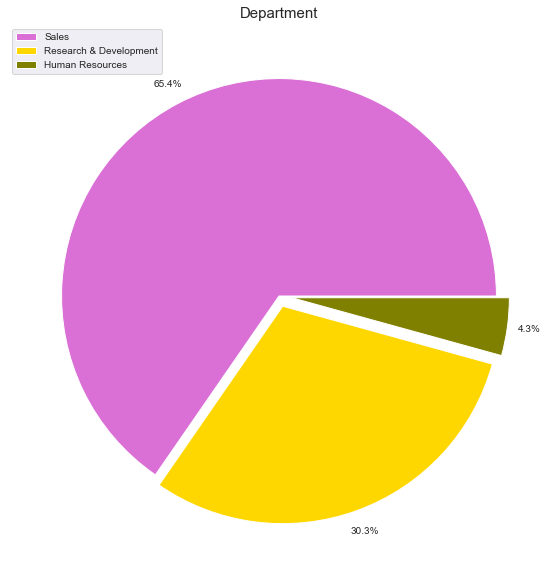

In [37]:
# Analysing Department
colors=['orchid','gold','olive']
size = data.Department.value_counts().values
explode_list=[0,0.05,0.06]
plt.figure(figsize=(15,10))
plt.pie(size,labels=None,explode=explode_list,colors=colors,autopct="%1.1f%%",pctdistance=1.1)
plt.title("Department",fontsize=15)
plt.legend(labels=['Sales','Research & Development','Human Resources'],loc='upper left') 
plt.show()

Sales department makes major part of an organisation, reasearch and development makes about 30 percent of an organsiation, Human resource being the least contibuter to the strength.

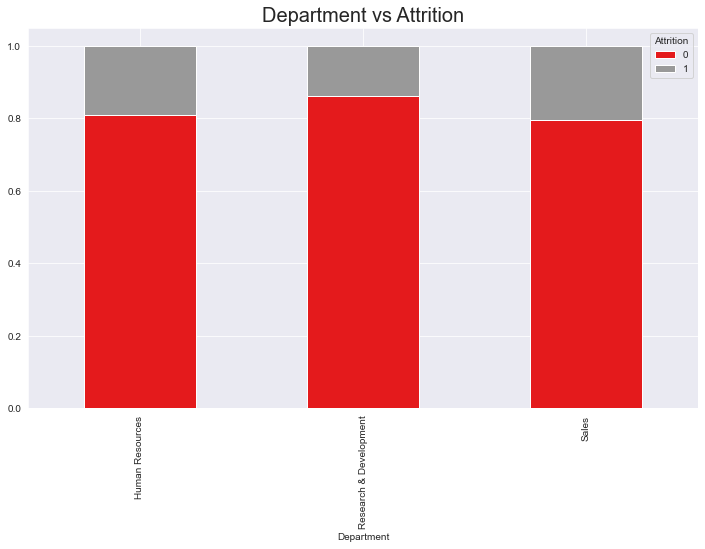

In [108]:
dept = pd.crosstab(data.Department,data.Attrition)
dept.div(dept.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='Set1')
plt.title("Department vs Attrition",fontsize=20)
plt.show()

Sales and Human resource has higher attrition rate whereas R&D has lesser rate, which means employee from R&D department are less likely to leave the organisation.

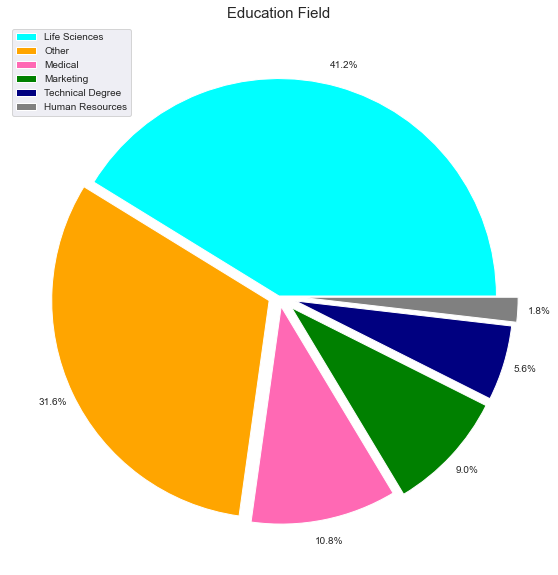

In [39]:
# Analysing Education Field
colors=["cyan","orange","hotpink","green","navy","grey"]
size = data.EducationField.value_counts().values
explode_list=[0,0.05,0.05,0.08,0.08,0.1]
plt.figure(figsize=(15,10))
plt.pie(size,labels=None,explode=explode_list,colors=colors,autopct="%1.1f%%",pctdistance=1.1)
plt.title("Education Field",fontsize=15)
plt.legend(labels=['Life Sciences','Other','Medical','Marketing','Technical Degree','Human Resources'],loc='upper left') 
plt.show()

Life sciences has the highest distribution and Technical degree and Human resource being the least which means more number of employees are from life sciences education background ,whereas from technical and human resources education background employees are lesser in number.

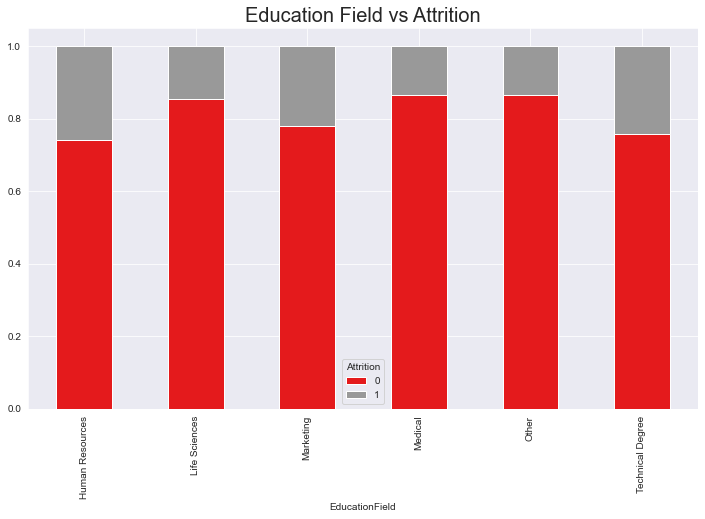

In [109]:
edu_f = pd.crosstab(data.EducationField,data.Attrition)
edu_f.div(edu_f.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='Set1')
plt.title("Education Field vs Attrition",fontsize=20)
plt.show()

Attrition is higher from HR educational background whereas  Medical and other educational background being the least.

Employees from Medical and other educational background are less likely to leave.

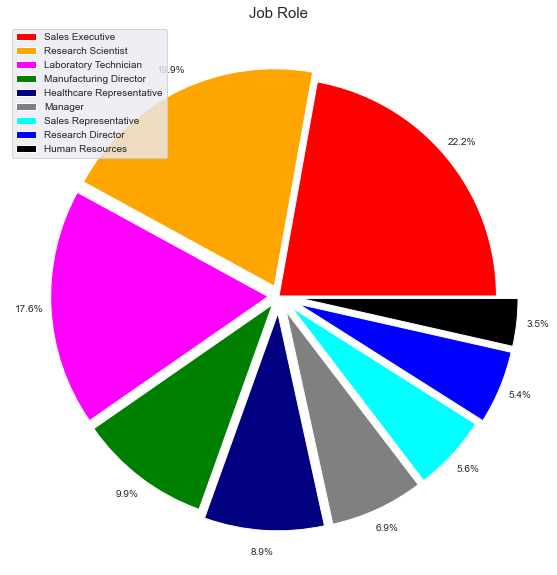

In [41]:
# Analysing Education Field
colors=["red","orange","magenta","green","navy","grey","cyan","blue","black"]
size = data.JobRole.value_counts().values
explode_list=[0,0.05,0.05,0.05,0.08,0.08,0.08,0.1,0.1]
plt.figure(figsize=(15,10))
plt.pie(size,labels=None,explode=explode_list,colors=colors,autopct="%1.1f%%",pctdistance=1.1)
plt.title("Job Role",fontsize=15)
plt.legend(labels=['Sales Executive','Research Scientist','Laboratory Technician','Manufacturing Director','Healthcare Representative','Manager','Sales Representative','Research Director','Human Resources'],loc='upper left') 
plt.show()

Major number of employees are from sales executive job role and the least are from human resources

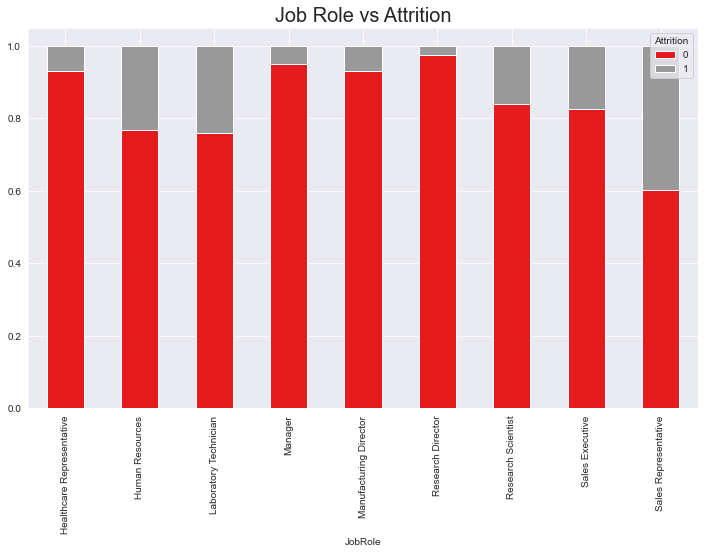

In [110]:
jobrole = pd.crosstab(data.JobRole,data.Attrition)
jobrole.div(jobrole.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='Set1')
plt.title("Job Role vs Attrition",fontsize=20)
plt.show()

Attrition is highest for Sales Representative, human resources and laboratory Technician, which means employees from these job roles have higher chance of leaving the organisation.

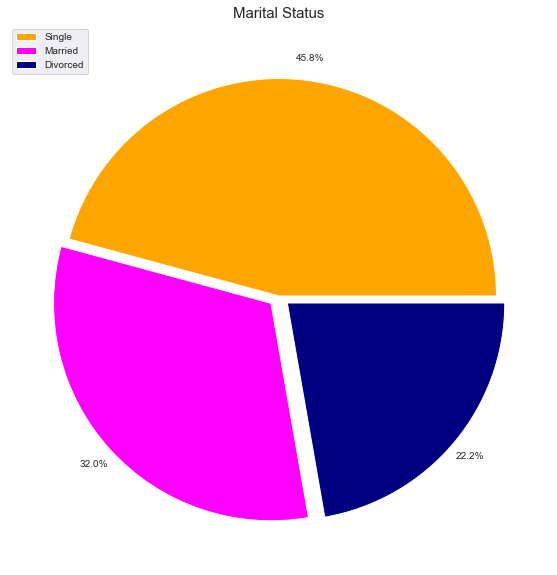

In [43]:
# Analysing Marital Status
colors=["orange","magenta","navy"]
size = data.MaritalStatus.value_counts().values
explode_list=[0,0.05,0.05]
plt.figure(figsize=(15,10))
plt.pie(size,labels=None,explode=explode_list,colors=colors,autopct="%1.1f%%",pctdistance=1.1)
plt.title("Marital Status",fontsize=15)
plt.legend(labels=['Single','Married','Divorced'],loc='upper left') 
plt.show()

Major number of employees are unmarried 

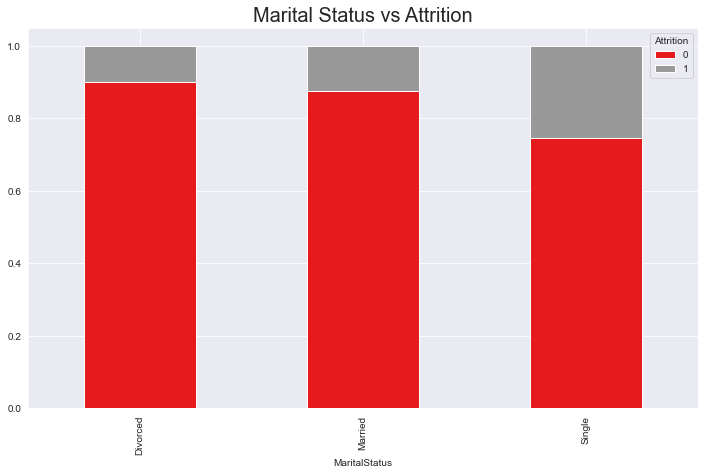

In [111]:
mary = pd.crosstab(data.MaritalStatus,data.Attrition)
mary.div(mary.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='Set1')
plt.title("Marital Status vs Attrition",fontsize=20)
plt.show()

Attrition is higher for unmarried employees and least for divorced, means unmarried employees are more likely to leave the organisation.

<AxesSubplot:title={'center':'Gender distribution'}, xlabel='Gender', ylabel='count'>

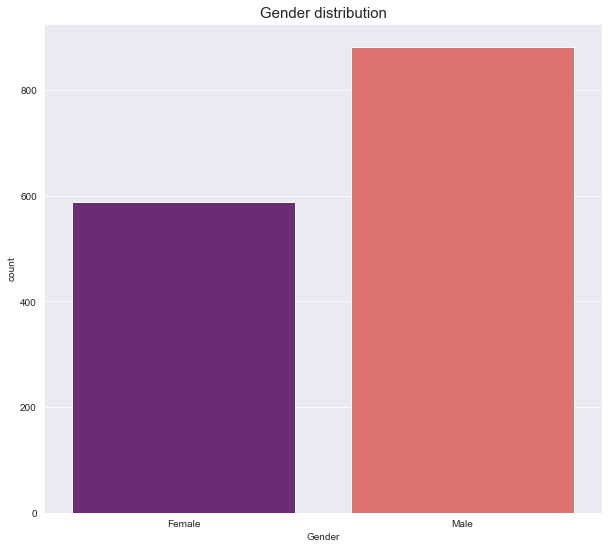

In [112]:
# analysing gender 
plt.figure(figsize=(10,9))
plt.title('Gender distribution',fontsize=15)
sns.countplot('Gender',data=data,palette='magma')

Mostly employees are male 

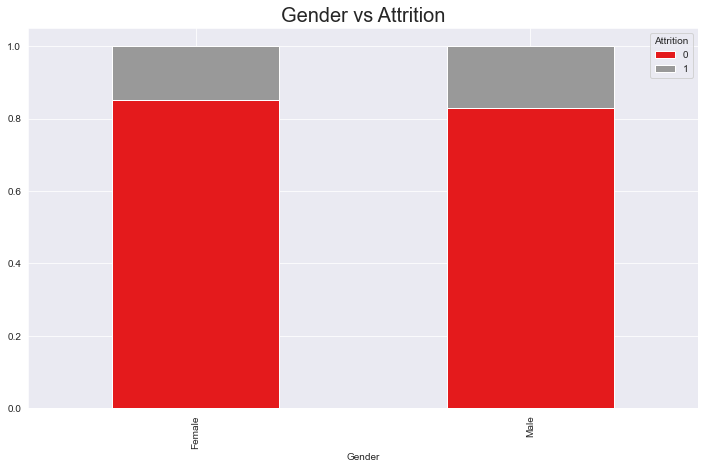

In [113]:
gender = pd.crosstab(data.Gender,data.Attrition)
gender.div(gender.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(12,7),cmap='Set1')
plt.title("Gender vs Attrition",fontsize=20)
plt.show()

Attrition is more for male employees, means males ar more likely to leave the organisation

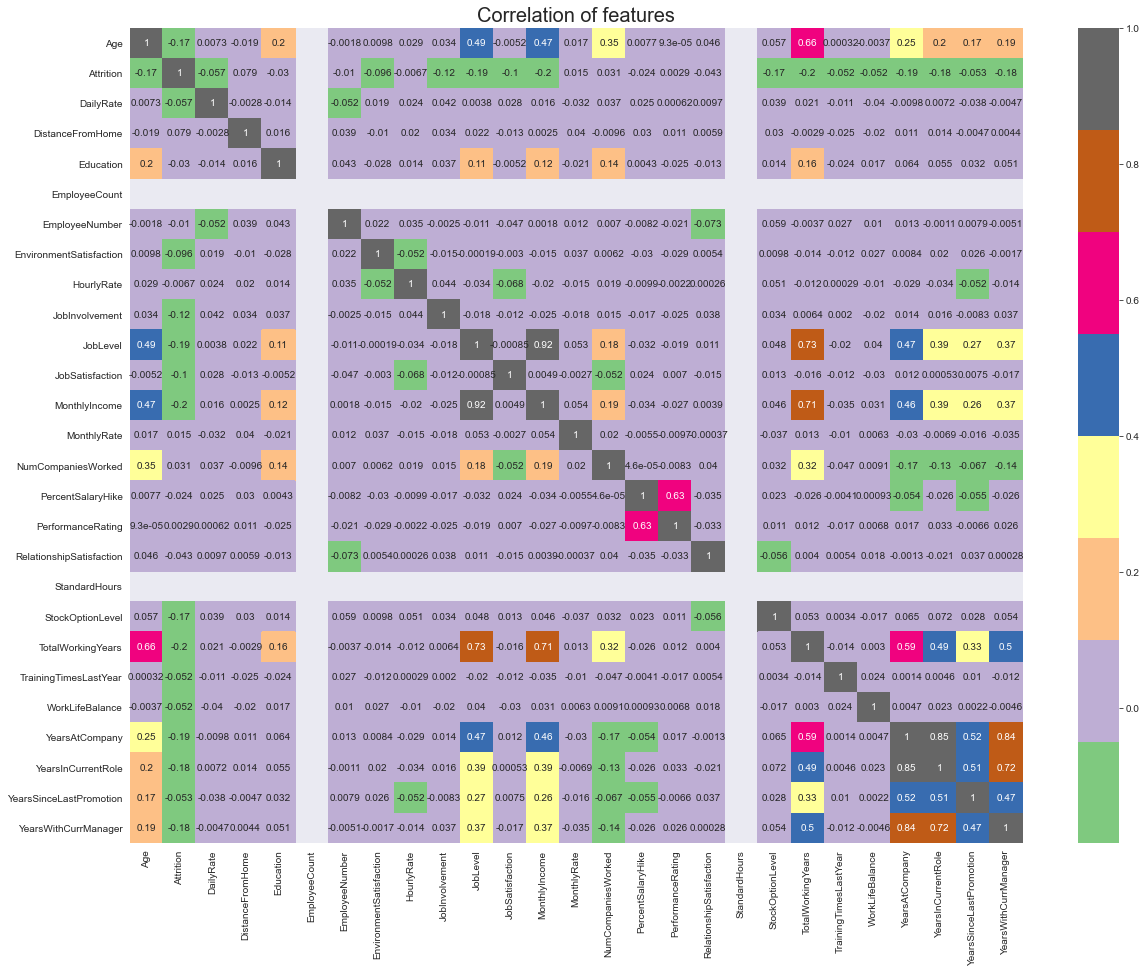

In [155]:
#checking correlation of variables using spearman method for ordinal variables
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(method='spearman'),annot=True,cmap='Accent')
plt.title('Correlation of features',fontsize=20)
plt.show()

The above plot gives visual information on correlation of variables, also some of the variables are correlated to each other which also depicts multicolinearity.The white spaces depicts that there is no correlation between the variables.

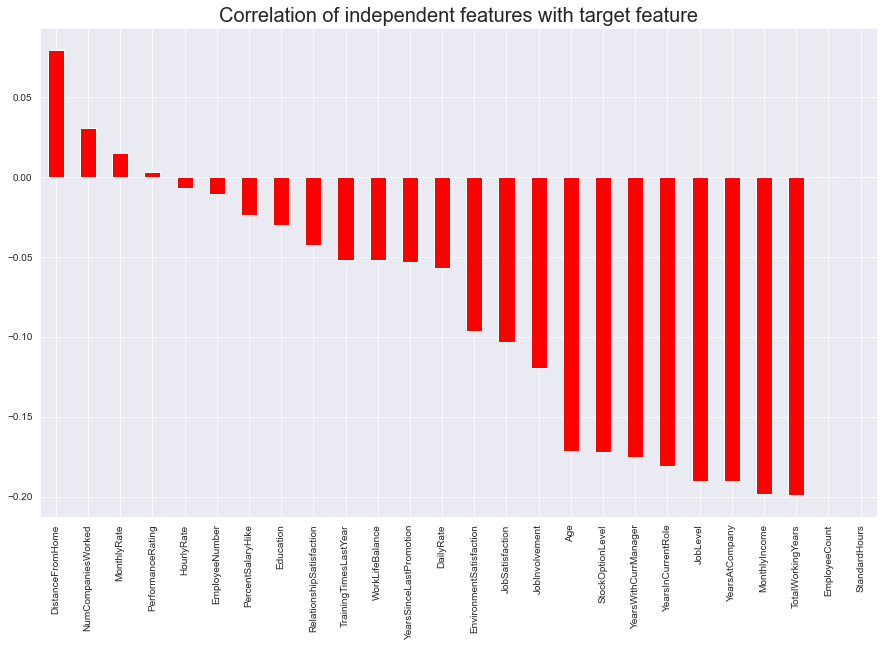

In [156]:
# Correlation with respect to Attrition
plt.figure(figsize=(15,9))
correlation.Attrition.sort_values(ascending=False).drop('Attrition').plot.bar(color='r')
plt.title('Correlation of independent features with target feature',fontsize=20)
plt.show()

Distance from home is the highest correlated feature and Total working years is the least correlated feature with respect to attrition.   

#### visualising outliers

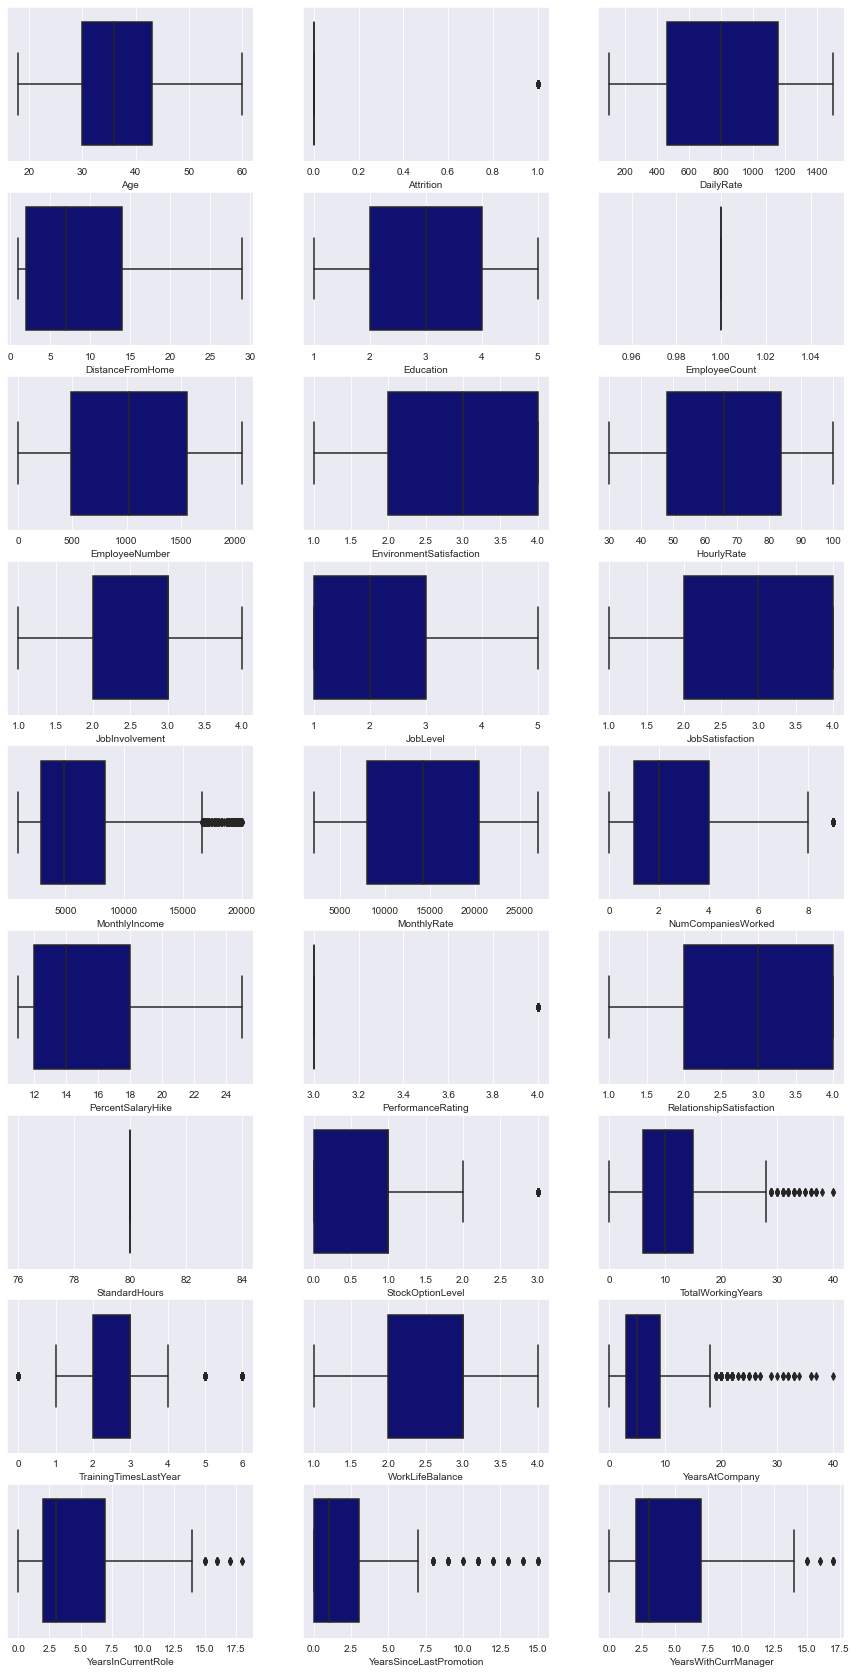

In [52]:
plot=1
plt.figure(figsize=(15,30))
for i in numerical_feat.columns:
    plt.subplot(9,3,plot)
    sns.boxplot(data[i],color='navy')
    plt.xlabel(i)
    plot+=1
plt.show()

From the above boxplots we can clearly see that that there is presence of outliers,since the features are discrete will be only handling the outliers in the case of monthly income since it has a large range of values.

### Feature Engineering and Pre-processing

Will be proceeding with Feature Engineering:

- Will be dropping some of the features with multicollinearity issue and unncessary columns 
- Imputation of missing values : Since we don't have missing values we won't have to perform this step
- Handling categorical variables
- Handling imbalanced dataset
- Scaling : Normalisation or Standardisation

In [53]:
dataset = data.copy()

In [54]:
# dropping Employee count and standard hours since 
# they have no significant relationship with the target feature 
dataset.drop(['EmployeeCount','StandardHours'],inplace=True,axis=1)
dataset.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7


In [55]:
# dropping EmployeeNumber as it is insignificant in prediction
dataset.drop(['EmployeeNumber'],axis=1,inplace=True)

In [56]:
#will be dropping MonthlyIncome and YearsAtCompany since they are correlated to predictor variables
dataset.drop(['MonthlyIncome','YearsAtCompany'],axis=1,inplace=True)

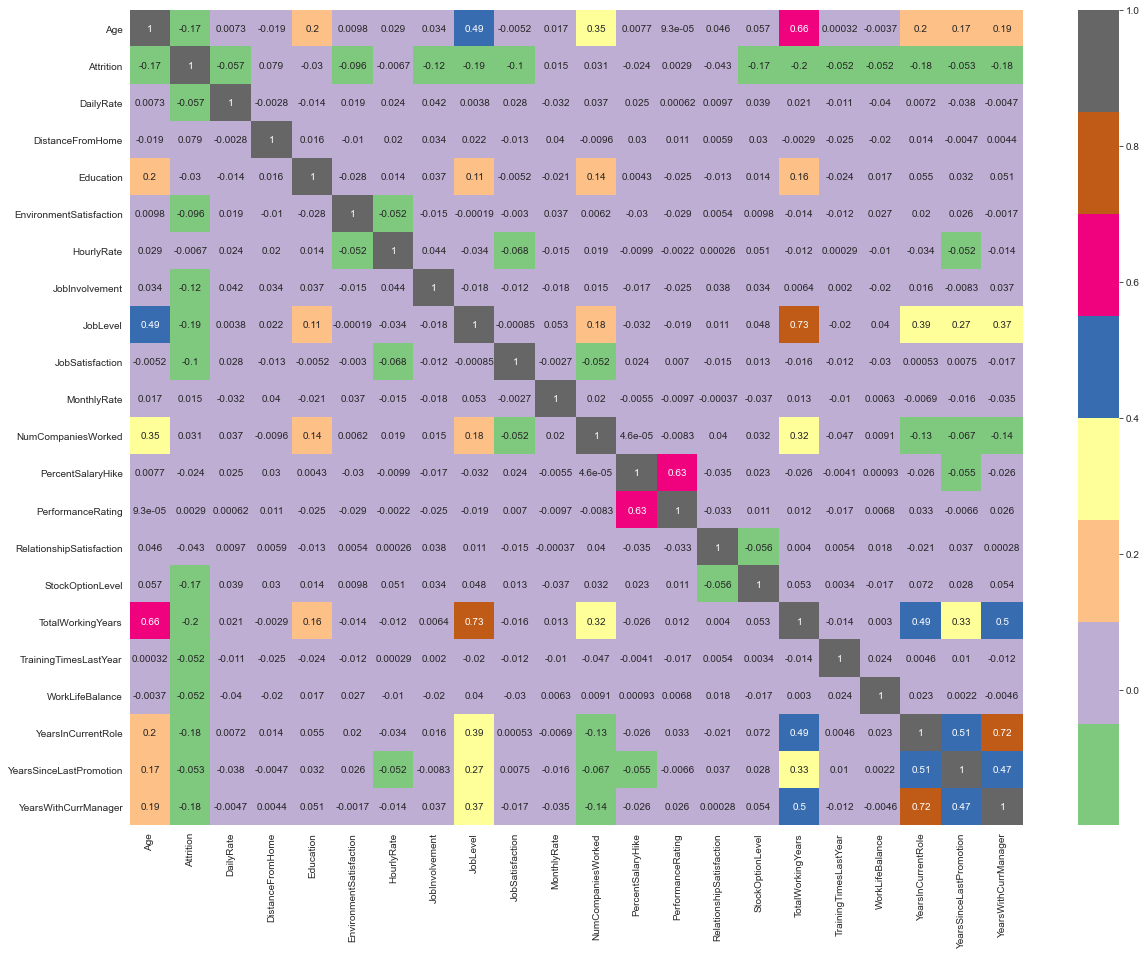

In [57]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(method='spearman'),annot=True,cmap='Accent')
plt.show()

Since the monthly income was correlated with the with indepentdent variable and we dropped it, so now we wont have to further treat outliers anymore because all other variables are discrete and that too with less range of values

#### Handling categorical variables

In [58]:
dataset.select_dtypes('object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [59]:
# since there is only one unique category in Over18 so will be dropping this column
dataset.drop(['Over18'],axis=1,inplace=True)

In [60]:
# The buisness travel feature has three unique categories :  
# [Travel_Rarely,Travel_Frequently,Non-Travel']  
# will be ordinally - encoding them 
dataset.BusinessTravel = dataset.BusinessTravel.replace({
                        'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2
                        })

In [61]:
# Gender and Overtime are binary in nature i.e. they have two unique values 
# so will be binary - encoding them 
dataset.Gender = dataset.Gender.replace({'Male':1,'Female':0})
dataset.OverTime = dataset.OverTime.replace({'Yes':1,'No':0})

In [62]:
# Department, EducationField,JobRole, MaritalStatus are nominal in nature
# so will be creating dummy variables for them     
new_df = pd.get_dummies(data=dataset,columns=['Department','EducationField','JobRole',
                                              'MaritalStatus'])
new_df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,2,0,94,3,2,4,19479,8,1,11,3,1,0,8,0,1,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,3,1,61,2,2,2,24907,1,0,23,4,4,1,10,3,3,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,4,1,92,2,1,3,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,4,0,56,3,1,3,23159,1,1,11,3,3,0,8,3,3,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,1,40,3,1,2,16632,9,0,12,3,4,1,6,3,3,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,23,2,3,1,41,4,2,4,12290,4,0,17,3,3,1,17,3,3,2,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,1,613,6,1,4,1,42,2,3,1,21457,4,0,15,3,1,1,9,5,3,7,1,7,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,1,155,4,3,2,1,87,4,2,2,5174,1,1,20,4,2,1,6,0,3,2,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,1023,2,3,4,1,63,2,2,2,13243,2,0,14,3,4,0,17,3,2,6,0,8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [63]:
## splitting into dependent and independent variables
X = new_df.drop(['Attrition'],axis=1)
Y = new_df.Attrition

#### Imbalance in dataset

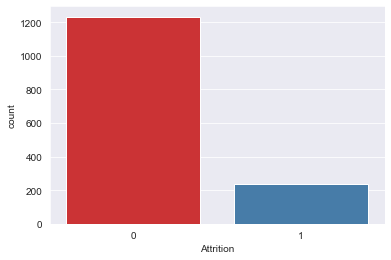

0    1233
1     237
Name: Attrition, dtype: int64


In [133]:
sns.countplot(data=new_df,x=Y,palette='Set1')
plt.show()
print(Y.value_counts())

In [65]:
# will be applying oversampling to balance the dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
x,y = sm.fit_resample(X,Y)
print(x.shape," \t ",y.shape)

(2466, 45)  	  (2466,)


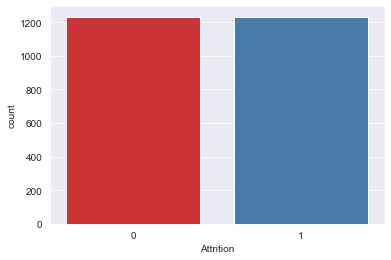

1    1233
0    1233
Name: Attrition, dtype: int64


In [132]:
#checking the target variable for imbalance
sns.countplot(data=new_df,x=y,palette='Set1')
plt.show()
print(y.value_counts())

The dataset is now balanced as the categories are perfectly balanced and same in number

#### Scaling

In [67]:
# Will be scaling the independent variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,0.5,0.715820,0.000000,0.25,0.333333,0.0,0.914286,0.666667,0.25,1.000000,0.698053,0.888889,1.0,0.000000,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.222222,0.000000,0.294118,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,1.0,0.126700,0.250000,0.00,0.666667,1.0,0.442857,0.333333,0.25,0.333333,0.916001,0.111111,0.0,0.857143,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.388889,0.066667,0.411765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.5,0.909807,0.035714,0.25,1.000000,1.0,0.885714,0.333333,0.00,0.666667,0.012126,0.666667,1.0,0.285714,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,1.0,0.923407,0.071429,0.75,1.000000,0.0,0.371429,0.666667,0.00,0.666667,0.845814,0.111111,1.0,0.000000,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.388889,0.200000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.5,0.350036,0.035714,0.00,0.000000,1.0,0.142857,0.666667,0.00,0.333333,0.583738,1.000000,0.0,0.071429,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.111111,0.133333,0.117647,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,0.571429,0.5,0.493916,0.035714,0.25,0.000000,0.0,0.700000,0.000000,0.00,0.333333,0.069785,0.333333,1.0,0.142857,0.0,0.666667,0.000000,0.125,0.333333,0.666667,0.166667,0.066667,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2462,0.261905,1.0,0.171081,0.857143,0.75,0.333333,0.0,0.314286,0.333333,0.00,0.000000,0.837583,0.444444,0.0,0.214286,0.0,0.333333,0.000000,0.200,0.666667,0.333333,0.166667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2463,0.619048,0.5,0.734431,0.321429,0.25,0.333333,1.0,0.657143,0.000000,0.50,0.666667,0.889701,0.777778,0.0,0.000000,0.0,0.666667,0.000000,0.575,0.333333,0.000000,0.277778,0.800000,0.529412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2464,0.261905,1.0,0.167502,0.500000,0.00,0.666667,0.0,0.700000,0.333333,0.25,0.666667,0.836780,0.000000,0.0,0.071429,0.0,0.000000,0.000000,0.225,0.166667,0.333333,0.333333,0.400000,0.352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Feature Importance

In [68]:
### Train test split
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,test_size=0.3,random_state=1)

In [69]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(xtrain,ytrain)
mutual_info

array([0.03419748, 0.        , 0.03460692, 0.03305282, 0.02092291,
       0.05753011, 0.01469816, 0.03399828, 0.0757111 , 0.08129098,
       0.06317373, 0.07354728, 0.0207887 , 0.00037592, 0.        ,
       0.01906877, 0.02091481, 0.0569089 , 0.05947548, 0.02364609,
       0.0282113 , 0.05388811, 0.01618733, 0.08010135, 0.00823217,
       0.0599318 , 0.02083354, 0.        , 0.02920795, 0.01530398,
       0.03350425, 0.        , 0.01666063, 0.02675396, 0.00712595,
       0.00297628, 0.02587558, 0.01668218, 0.04507925, 0.01273499,
       0.01919178, 0.0030796 , 0.03118917, 0.04765927, 0.        ])

In [70]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = xtrain.columns
mutual_info.sort_values(ascending=False)

JobLevel                             0.081291
YearsWithCurrManager                 0.080101
JobInvolvement                       0.075711
MonthlyRate                          0.073547
JobSatisfaction                      0.063174
Department_Research & Development    0.059932
TotalWorkingYears                    0.059475
EnvironmentSatisfaction              0.057530
StockOptionLevel                     0.056909
YearsInCurrentRole                   0.053888
MaritalStatus_Married                0.047659
JobRole_Research Director            0.045079
DailyRate                            0.034607
Age                                  0.034197
HourlyRate                           0.033998
EducationField_Medical               0.033504
DistanceFromHome                     0.033053
MaritalStatus_Divorced               0.031189
EducationField_Life Sciences         0.029208
WorkLifeBalance                      0.028211
JobRole_Healthcare Representative    0.026754
JobRole_Manager                   

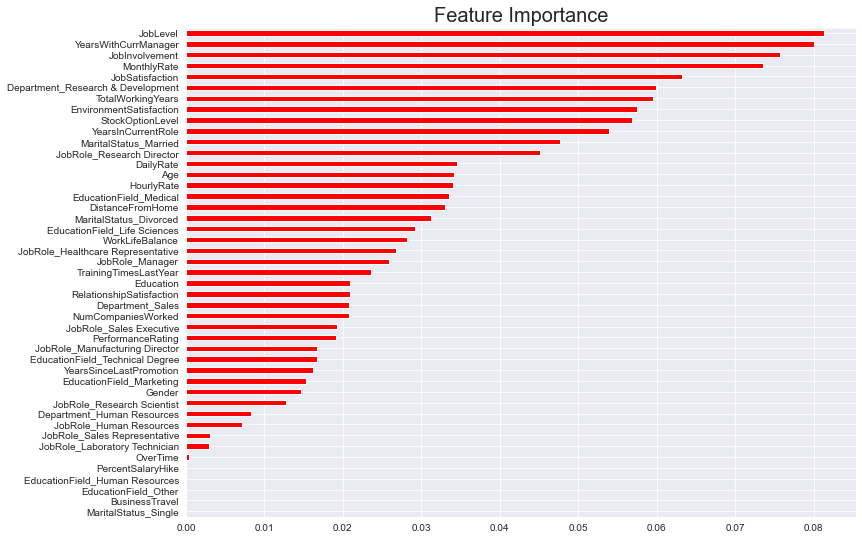

In [89]:
plt.title("Feature Importance",fontsize=20)
mutual_info.sort_values().plot(kind='barh',figsize=(12,9),color='r')
plt.show()

In [85]:
from sklearn.feature_selection import SelectPercentile

#selecting top 50 percentile
selected_cols = SelectPercentile(mutual_info_classif,50)
selected_cols.fit(xtrain,ytrain)

SelectPercentile(percentile=50,
                 score_func=<function mutual_info_classif at 0x128092550>)

In [86]:
selected_cols.get_support()

array([ True, False,  True, False, False,  True, False,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False,  True,  True,  True])

In [87]:
xtrain.columns[selected_cols.get_support()]

Index(['Age', 'DailyRate', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyRate',
       'OverTime', 'StockOptionLevel', 'TotalWorkingYears',
       'YearsInCurrentRole', 'YearsWithCurrManager',
       'Department_Human Resources', 'Department_Research & Development',
       'EducationField_Life Sciences', 'EducationField_Medical',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

### Model Buliding 

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_roc_curve,roc_curve,auc,roc_auc_score,precision_score,recall_score,f1_score

In [78]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SVC = SVC()
DTC = DecisionTreeClassifier()
BNB = BernoulliNB()
RTF = RandomForestClassifier()
ADB = AdaBoostClassifier()
GB = GradientBoostingClassifier()

In [79]:
models = [("Logistic Regression ",LR),
          ("K Nearest Neighbor classifier ",KNN),
          ("Support Vector classifier ",SVC),
          ("Decision Tree classifier ",DTC),
          ("Random forest classifier ",RTF),
          ("AdaBoost classifier",ADB),
          ("Gradient Boosting classifier ",GB),
          ("Naive Bayes classifier",BNB)]

##### Training the models 

In [92]:
for name,model in models:
    model.fit(xtrain,ytrain)
    print(name," trained")

Logistic Regression   trained
K Nearest Neighbor classifier   trained
Support Vector classifier   trained
Decision Tree classifier   trained
Random forest classifier   trained
AdaBoost classifier  trained
Gradient Boosting classifier   trained
Naive Bayes classifier  trained


##### Evaluating the models

In [93]:
train_scores=[]
test_scores=[]
Model = []
for name,model in models:
    print("******",name,"******")
    train_acc = accuracy_score(ytrain,model.predict(xtrain))
    test_acc = accuracy_score(ytest,model.predict(xtest))
    print('Train score : ',train_acc)
    print('Test score : ',test_acc)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    Model.append(name)

****** Logistic Regression  ******
Train score :  0.9310544611819235
Test score :  0.9094594594594595
****** K Nearest Neighbor classifier  ******
Train score :  0.9397450753186558
Test score :  0.8945945945945946
****** Support Vector classifier  ******
Train score :  0.9449594438006953
Test score :  0.8891891891891892
****** Decision Tree classifier  ******
Train score :  1.0
Test score :  0.831081081081081
****** Random forest classifier  ******
Train score :  1.0
Test score :  0.9094594594594595
****** AdaBoost classifier ******
Train score :  0.9177288528389339
Test score :  0.9081081081081082
****** Gradient Boosting classifier  ******
Train score :  0.9623406720741599
Test score :  0.8959459459459459
****** Naive Bayes classifier ******
Train score :  0.8568945538818077
Test score :  0.85


****** Logistic Regression  ******

 [[338   8]
 [ 59 335]]

 ROC_AUC_SCORE :  0.913566209911681
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       346
           1       0.98      0.85      0.91       394

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.92      0.91      0.91       740

Precision:  0.9766763848396501
Recall:  0.850253807106599
F1 score:  0.9090909090909092
AxesSubplot(0.125,0.536818;0.62x0.343182)


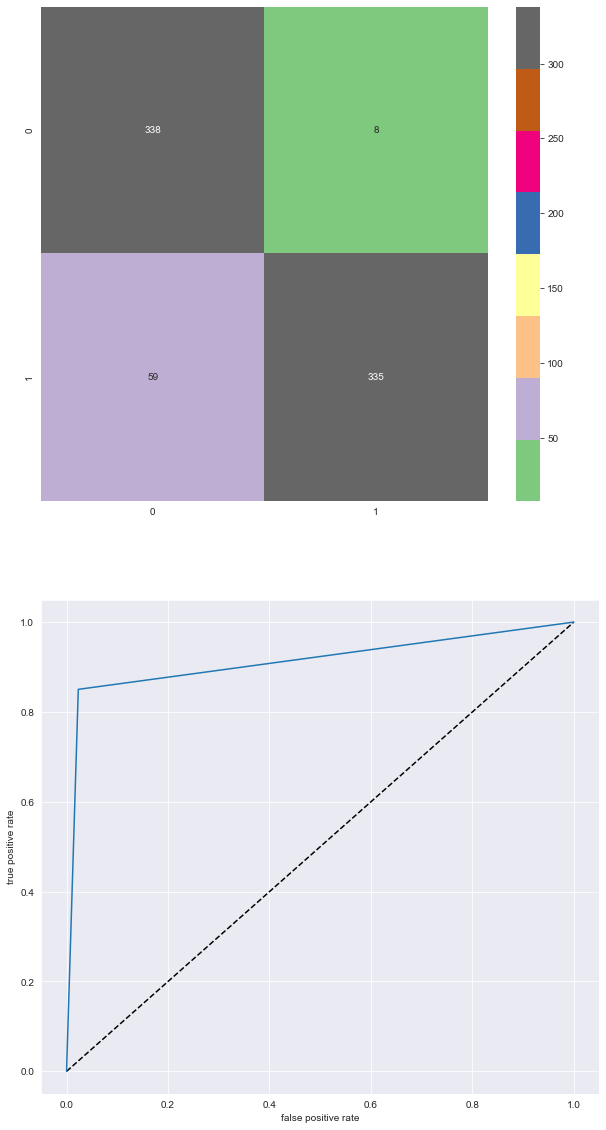

****** K Nearest Neighbor classifier  ******

 [[322  24]
 [ 54 340]]

 ROC_AUC_SCORE :  0.8967900002934187
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       346
           1       0.93      0.86      0.90       394

    accuracy                           0.89       740
   macro avg       0.90      0.90      0.89       740
weighted avg       0.90      0.89      0.89       740

Precision:  0.9340659340659341
Recall:  0.8629441624365483
F1 score:  0.8970976253298154
AxesSubplot(0.125,0.536818;0.62x0.343182)


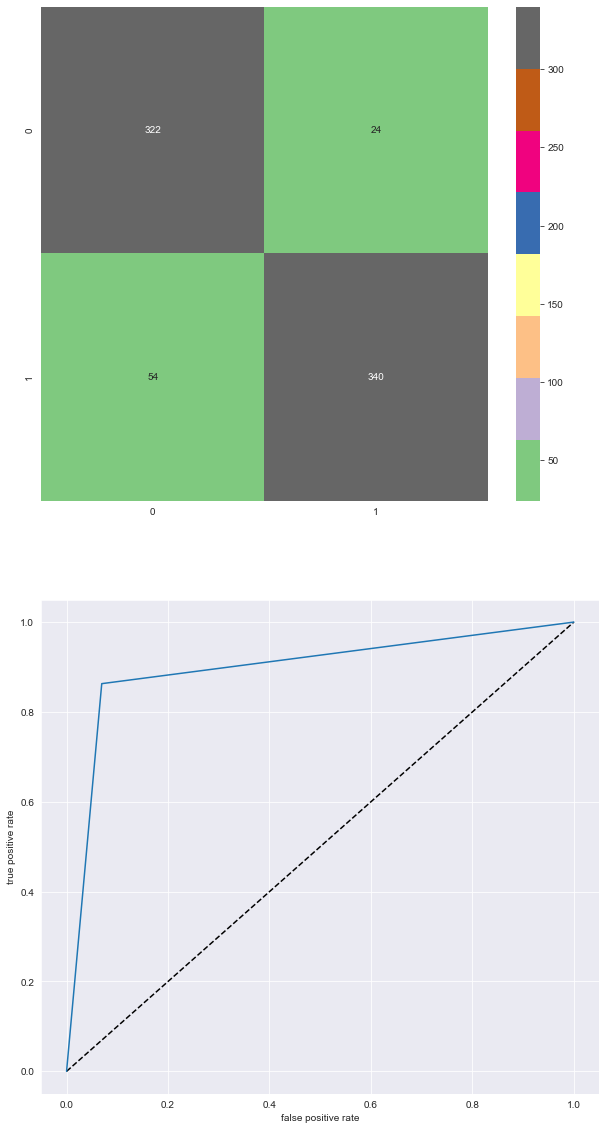

****** Support Vector classifier  ******

 [[342   4]
 [ 78 316]]

 ROC_AUC_SCORE :  0.8952348816055866
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       346
           1       0.99      0.80      0.89       394

    accuracy                           0.89       740
   macro avg       0.90      0.90      0.89       740
weighted avg       0.91      0.89      0.89       740

Precision:  0.9875
Recall:  0.8020304568527918
F1 score:  0.8851540616246499
AxesSubplot(0.125,0.536818;0.62x0.343182)


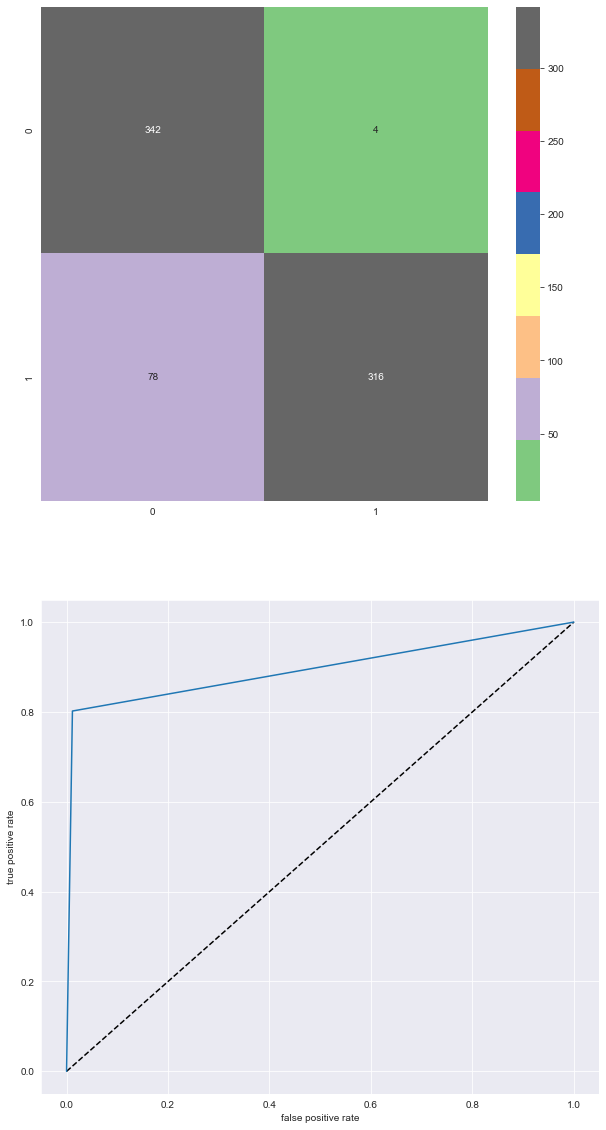

****** Decision Tree classifier  ******

 [[284  62]
 [ 63 331]]

 ROC_AUC_SCORE :  0.8304553856987764
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       346
           1       0.84      0.84      0.84       394

    accuracy                           0.83       740
   macro avg       0.83      0.83      0.83       740
weighted avg       0.83      0.83      0.83       740

Precision:  0.8422391857506362
Recall:  0.8401015228426396
F1 score:  0.841168996188056
AxesSubplot(0.125,0.536818;0.62x0.343182)


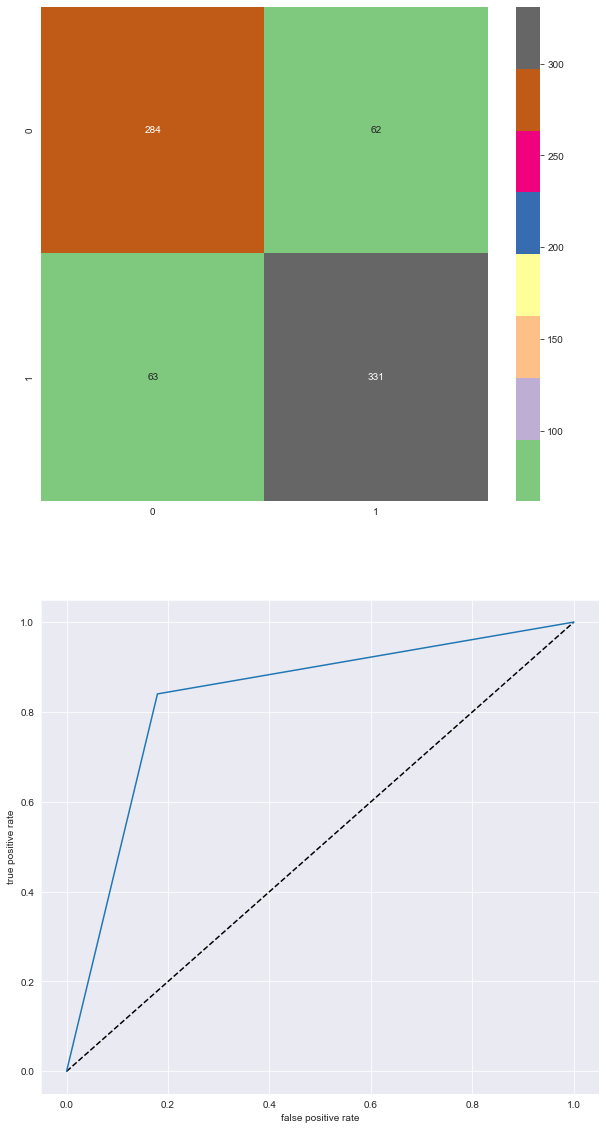

****** Random forest classifier  ******

 [[340   6]
 [ 61 333]]

 ROC_AUC_SCORE :  0.9139183122560958
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       346
           1       0.98      0.85      0.91       394

    accuracy                           0.91       740
   macro avg       0.92      0.91      0.91       740
weighted avg       0.92      0.91      0.91       740

Precision:  0.9823008849557522
Recall:  0.8451776649746193
F1 score:  0.908594815825375
AxesSubplot(0.125,0.536818;0.62x0.343182)


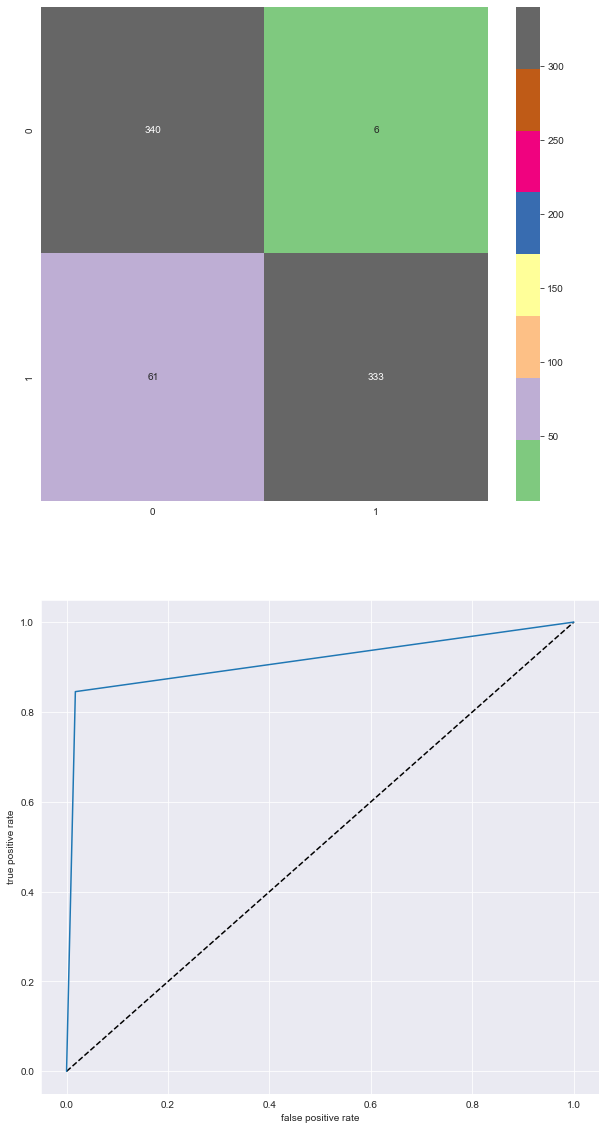

****** AdaBoost classifier ******

 [[328  18]
 [ 50 344]]

 ROC_AUC_SCORE :  0.9105366626566122
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       346
           1       0.95      0.87      0.91       394

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740

Precision:  0.9502762430939227
Recall:  0.8730964467005076
F1 score:  0.91005291005291
AxesSubplot(0.125,0.536818;0.62x0.343182)


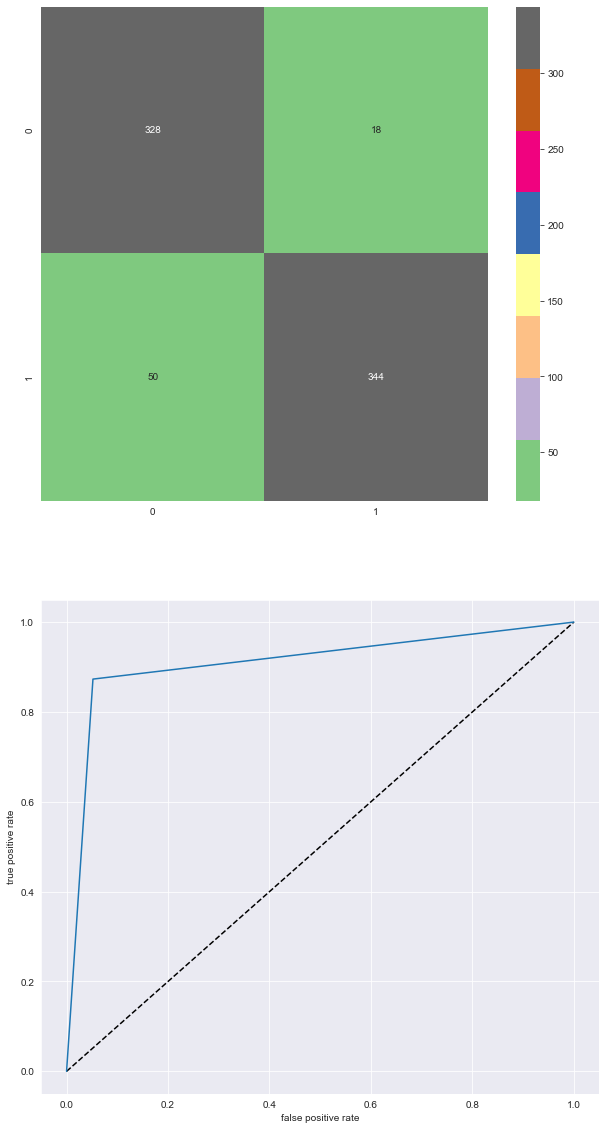

****** Gradient Boosting classifier  ******

 [[336  10]
 [ 67 327]]

 ROC_AUC_SCORE :  0.900523752237317
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       346
           1       0.97      0.83      0.89       394

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.91      0.90      0.90       740

Precision:  0.9703264094955489
Recall:  0.8299492385786802
F1 score:  0.8946648426812586
AxesSubplot(0.125,0.536818;0.62x0.343182)


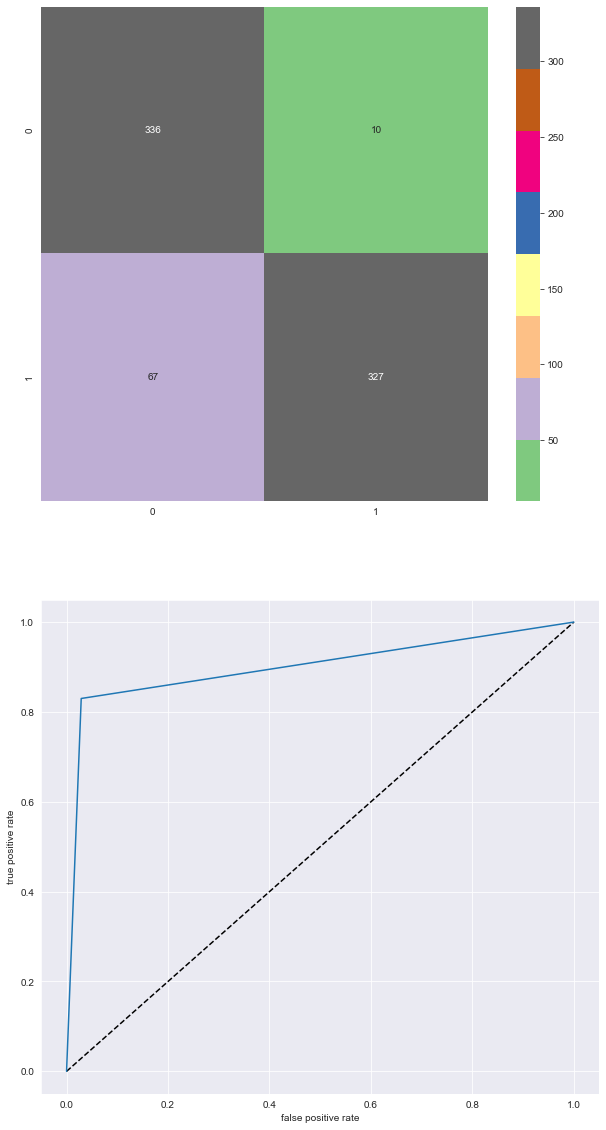

****** Naive Bayes classifier ******

 [[317  29]
 [ 82 312]]

 ROC_AUC_SCORE :  0.8540315718435492
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       346
           1       0.91      0.79      0.85       394

    accuracy                           0.85       740
   macro avg       0.85      0.85      0.85       740
weighted avg       0.86      0.85      0.85       740

Precision:  0.9149560117302052
Recall:  0.7918781725888325
F1 score:  0.8489795918367348
AxesSubplot(0.125,0.536818;0.62x0.343182)


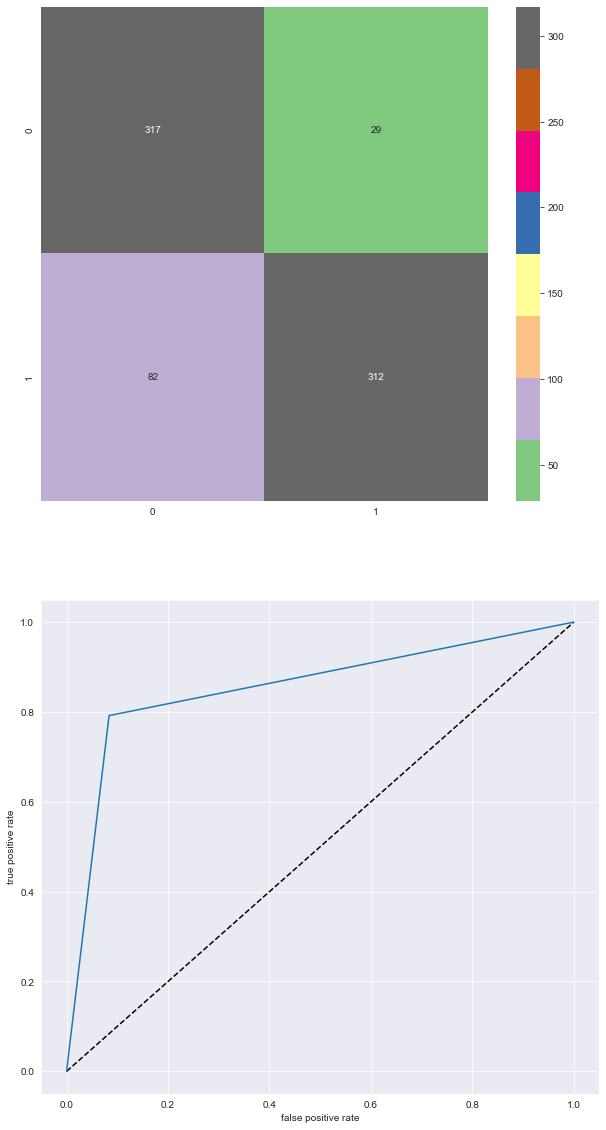

In [94]:
# checking different metrics for evaluation
precision_ =[]
recall_ = []
f1score = []
rocauc = []
for name,model in models:
    print("******",name,"******")
    cm = confusion_matrix(ytest,model.predict(xtest))
    print("\n",cm)
    fpr,tpr,thresholds=roc_curve(ytest,model.predict(xtest))
    roc_auc= auc(fpr,tpr)
    print("\n","ROC_AUC_SCORE : ",roc_auc)
    rocauc.append(roc_auc)
    print(classification_report(ytest,model.predict(xtest)))
    precision = precision_score(ytest, model.predict(xtest))
    print('Precision: ', precision)
    precision_.append(precision)
    recall = recall_score(ytest, model.predict(xtest))
    print('Recall: ', recall)
    recall_.append(recall)
    f1 = f1_score(ytest, model.predict(xtest))
    print('F1 score: ', f1)
    f1score.append(f1)
    plt.figure(figsize=(10,20))
    plt.subplot(211)
    print(sns.heatmap(cm,annot=True,fmt='d',cmap='Accent'))
    plt.subplot(212)
    plt.plot([0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

In [95]:
# checking cross validation score
crossval=[]
for name,model in models:
    print("******",name,"******")
    cv_= cross_val_score(model,x_scaled,y,cv=5).mean()
    print(cv_)
    crossval.append(cv_)

****** Logistic Regression  ******
0.8796963152146242
****** K Nearest Neighbor classifier  ******
0.89181003687249
****** Support Vector classifier  ******
0.8918757339596455
****** Decision Tree classifier  ******
0.827731561701883
****** Random forest classifier  ******
0.9044017048394117
****** AdaBoost classifier ******
0.8573749086399882
****** Gradient Boosting classifier  ******
0.8679316093322713
****** Naive Bayes classifier ******
0.8354435785203375


In [96]:
# creating a data frame for evaluation
evaluate = pd.DataFrame({})
evaluate['Model'] = Model
evaluate['Train score'] = train_scores
evaluate['Test score'] = test_scores
evaluate['Precision'] = precision_
evaluate['Recall'] = recall_
evaluate['F1 score'] = f1score
evaluate['Roc-Auc score'] = rocauc
evaluate['Cross val score'] = crossval

evaluate

,Model,Train score,Test score,Precision,Recall,F1 score,Roc-Auc score,Cross val score
0,Logistic Regression,0.931054,0.909459,0.976676,0.850254,0.909091,0.913566,0.879696
1,K Nearest Neighbor classifier,0.939745,0.894595,0.934066,0.862944,0.897098,0.896790,0.891810
2,Support Vector classifier,0.944959,0.889189,0.987500,0.802030,0.885154,0.895235,0.891876
3,Decision Tree classifier,1.000000,0.831081,0.842239,0.840102,0.841169,0.830455,0.827732
4,Random forest classifier,1.000000,0.909459,0.982301,0.845178,0.908595,0.913918,0.904402
5,AdaBoost classifier,0.917729,0.908108,0.950276,0.873096,0.910053,0.910537,0.857375
6,Gradient Boosting classifier,0.962341,0.895946,0.970326,0.829949,0.894665,0.900524,0.867932
7,Naive Bayes classifier,0.856895,0.850000,0.914956,0.791878,0.848980,0.854032,0.835444


From the above Dataframe we can say that Random Forest is performing the best for this use case since it has a good accuracy score, also type 1 and type 2 error are low as infered from confusion matrix. Precision and recall is also high, with a good validation score.

### Hyperparameter tuning

In [162]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
          'criterion':['gini','entropy'],
         'max_features': ['auto', 'sqrt'],
         'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
         'min_samples_split': [2, 5, 10, 15, 100],
         'min_samples_leaf': [1, 2, 5, 10]
         }
random_search=RandomizedSearchCV(RTF,param_distributions=params,n_jobs=-1,cv=5,verbose=5)
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=5)

In [163]:
random_search.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [164]:
random_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=500)

Accuracy Score 0.9121621621621622
Cross val score 0.9011562687339352


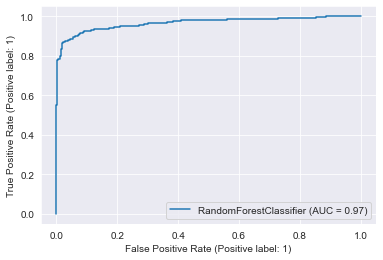

In [165]:
## final model
final_mod = RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=500)
final_mod.fit(xtrain,ytrain)
final_pred = final_mod.predict(xtest)
print("Accuracy Score",accuracy_score(ytest,final_pred))
cross_val = cross_val_score(final_mod,x_scaled,y,scoring='accuracy',cv=5).mean()
print("Cross val score",cross_val)
plot_roc_curve(final_mod,xtest,ytest)

### Saving the model

In [167]:
import joblib
joblib.dump(final_mod,'hr_attrition.pkl')

['hr_attrition.pkl']